# Fourier Transforms

Based on lectures by Nils Halversson at CU Boulder

# Importance of FTs

 * Antenna theory:
  *  The farfield beam pattern is the FT of the antenna illumination pattern
 * Optics:
  *   An FT relation exists between back and front focal points of a converging lens. For example: a plane wave is transformed into a delta function. A lens is therefore a Fourier transform device.
 * Quantum mechanics
  * There is an FT relation between a particles position $\vec{x}$ and its momentum $\vec{p}$


 * Probability
  * If x, y are independent random variables, if we define a new random variable $z = x + y$, then the PDF of $z$ is $f_z(z) = \int_{−∞}^{∞} dx f_x(x) f_y(z − x)$
  * In otherwords, the PDF of a sum of two random variables is a convolution
 * Interferometry
  * The output of an interferometer is the FT of the sky intensity distribution.


 * Signal processing and filtering
  * Much of filtering is done in the (spatial or temporal) frequency domain.
 * Spectroscopy
  * Many types of spectrometer: grating, Fabry-Perot, Fourier transform spectrometer (FTS), work on the principle of coherent wave interference, which can be understood with Fourier transforms.

In [1]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['font.size'] = 14
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 100

In [2]:

import numpy as np

In the following examples, we will use a Fourier transform pair of $t$, time, and $\nu$, frequency, where dimensionally, $[t] = [1/\nu]$ (e.g., $[t]=\mathrm{s}$ and $\nu=[\mathrm{Hz}]$)

We will sometimes also relate space and spatial frequency (or wavenumber), often denoted $x$ and $k$.

Definition:

The Fourier transform $F(t)$ of a function $f(\nu)$, also written $FT\{f(\nu)\}$, is

$$FT\{f(\nu)\} = F(t) = \int_{-\infty}^\infty f(\nu) e^{-2\pi i \nu t} d \nu $$

giving an inverse
$${FT}\{F(t)\} = f(\nu) = \int_{-\infty}^\infty F(t) e^{+2\pi i \nu t} d t $$

## Proof that these are inverses

Exercise:

plug one into the other and prove you get an equality

# Simple Fourier Transforms

Sines and cosines:

If $f(\nu) = \cos \nu$, then the Fourier transform of $f$ is:

$$F(t) = \int_{-\infty}^{\infty} \left(\cos \nu\right) e^{-2 i \pi t \nu} d\nu$$




Eusing Euler's formula
$$e^{i \nu} = \cos \nu + i\sin \nu$$
$$e^{-i \nu} = \cos \nu - i\sin \nu$$

we get $\cos \nu$:
$$\frac{1}{2}\left(e^{i \nu} + e^{-i \nu}\right) = \cos \nu $$


We can substitute our expression for $\cos \nu = \frac{1}{2}\left(e^{i \nu} + e^{-i \nu}\right) $
 into
$$F(t) = \int_{-\infty}^{\infty} \left(\cos \nu\right) e^{-2 i \pi t \nu} d\nu$$


to get
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu} + e^{-i \nu}\right) e^{-2 i \pi t \nu} d\nu$$

Combining terms, we get:
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu-2 i \pi t \nu} + e^{-i \nu-2 i \pi t \nu}\right)  d\nu$$

Which, with a little more manipulation, becomes:
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu(1-2 \pi t)} + e^{-i \nu(1+2  \pi t )}\right)  d\nu$$

We can inspect this equation a bit to see what it tells us.
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left(e^{i \nu(1-2 \pi t)} + e^{-i \nu(1+2  \pi t )}\right)  d\nu$$

If we re-expand using Euler's rules, it becomes
$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left[\cos(\nu(1-2 \pi t)) -i\sin(\nu(1-2 \pi t)) + \cos(\nu(1+2  \pi t )) + i\sin(1+2  \pi t )) \right]  d\nu$$

The integral of the $\sin$ terms can be ignored; formally the integral doesn't exist, but the positive and negative area are the same so it goes to zero.

The cosine terms:

$$F(t) = \int_{-\infty}^{\infty} \frac{1}{2}\left[\cos(\nu(1-2 \pi t)) + \cos(\nu(1+2  \pi t ))  \right]  d\nu$$

This integral does not exist _except_ when $1-2 \pi t = 0$ or $1+2 \pi t = 0$, since $\cos 0 = 1$.

$$F(t) = \int_{-\infty}^{\infty} \left(\cos \nu\right) e^{-2 i \pi t \nu} d\nu$$

$F(t) = 0$ unless $t=\frac{1}{2\pi}$ or $t=-\frac{1}{2\pi}$, in which case it is 1

$$F(t) = FT\{\cos \nu\} = \delta\left(t\pm\frac{1}{2\pi}\right)$$

$\delta$ is the [Dirac Delta](https://en.wikipedia.org/wiki/Dirac_delta_function)

# The Dirac Delta

You need to know these properties:

$$\delta(x) \simeq \begin{cases} +\infty, & x = 0 \\ 0, & x \ne 0 \end{cases}$$


$$\int_{-\infty}^\infty \delta(x) \, \mathrm dx = 1$$


$$\int_{-\infty}^\infty f(t) \,\delta(t-T)\,\mathrm dt = f(T)$$


# Fourier Transform Pairs

Rather than derive more solutions, we'll show what some solutions look like.

Start with cosine.  

The pair is $FT\{\cos \nu/\nu_0\} = \delta\left(t\pm\frac{1}{2\pi \nu_0}\right)$.  When evaluating the $\delta$ in a discrete Fourier tranform (i.e., on actual data), we draw it as a single spike.

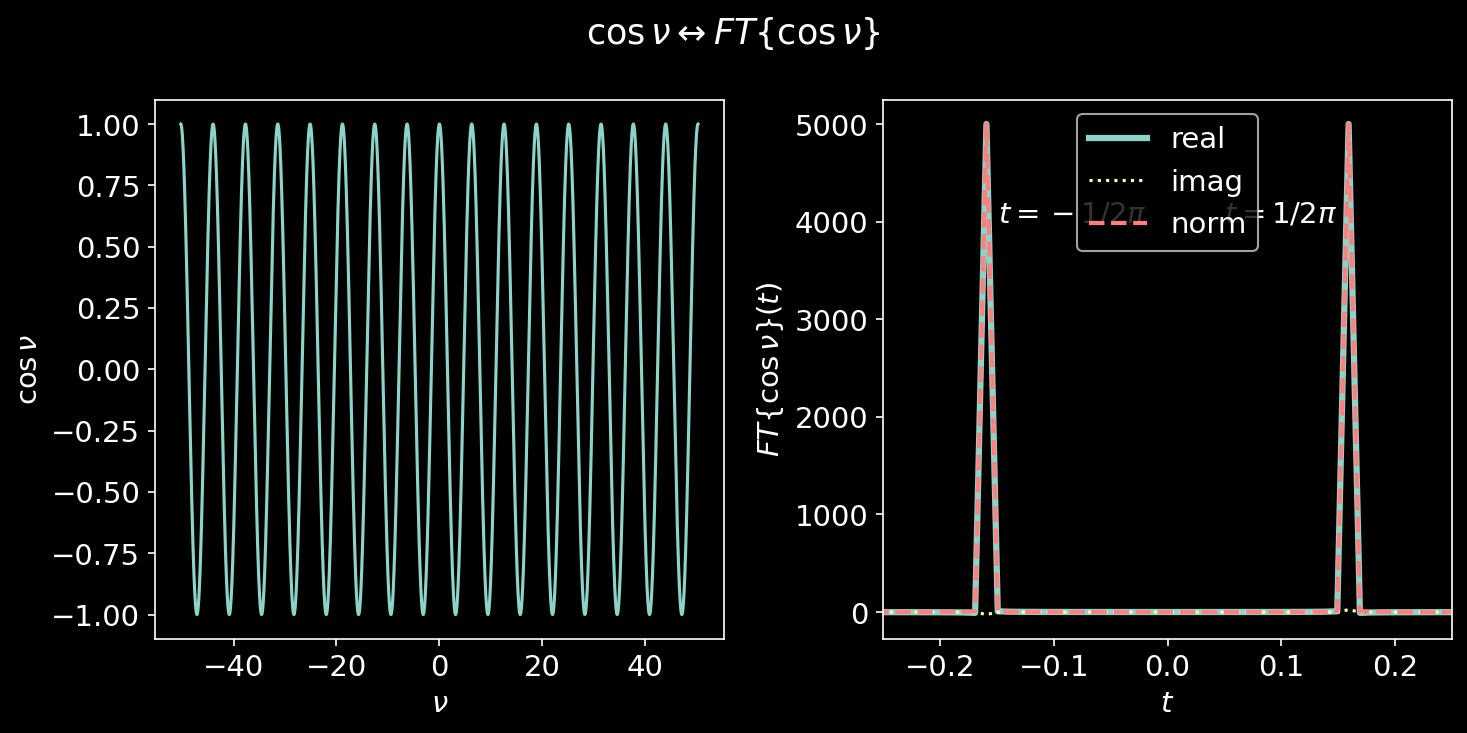

In [3]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.cos(nu)
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\cos\nu$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real', linewidth=3)
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color=(1,0.5,0.5), alpha=1, linewidth=2)
ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
pl.legend(loc='best')
ax2.set_xlim([-0.25, 0.25]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\cos \nu\}(t)$');
pl.suptitle(r"$\cos\nu \leftrightarrow FT\{\cos \nu\}$");
pl.tight_layout()

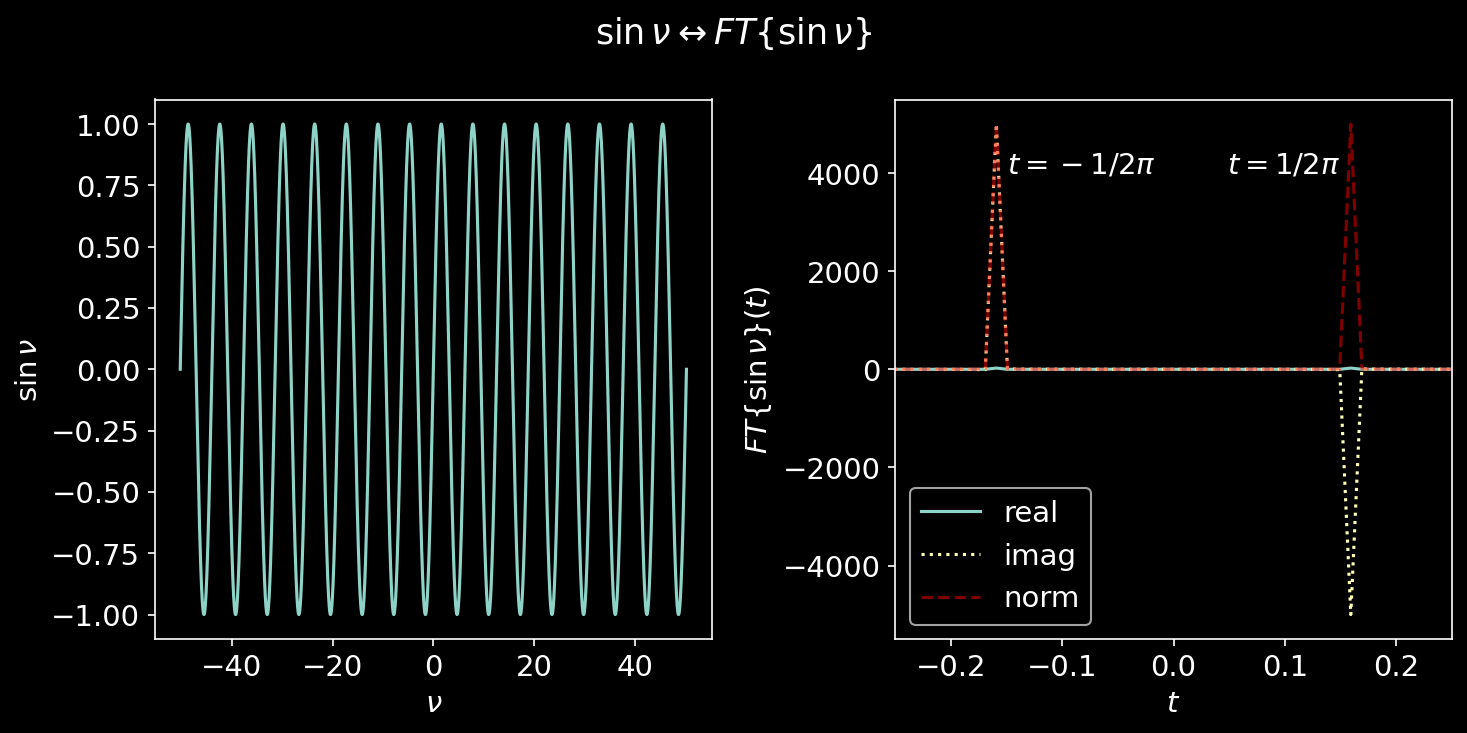

In [4]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.sin(nu)
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\sin\nu$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
pl.legend(loc='best')
ax2.set_xlim([-0.25, 0.25]);ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\sin \nu\}(t)$');
pl.suptitle(r"$\sin\nu \leftrightarrow FT\{\sin \nu\}$");
pl.tight_layout()

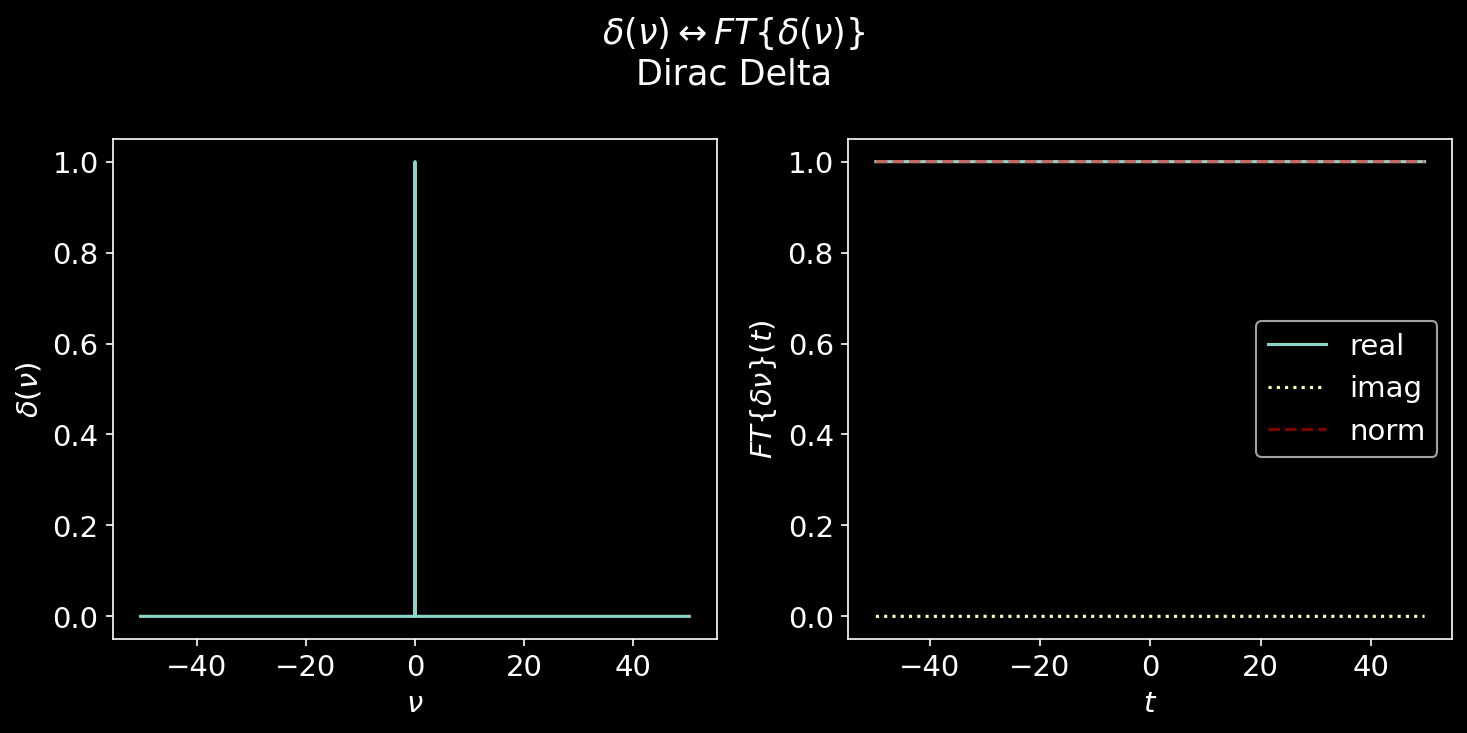

In [5]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.zeros_like(nu)
y[0] = 1
y = np.fft.fftshift(y)
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$\delta(\nu) \leftrightarrow FT\{\delta(\nu)\}$"
            "\nDirac Delta");
pl.tight_layout()

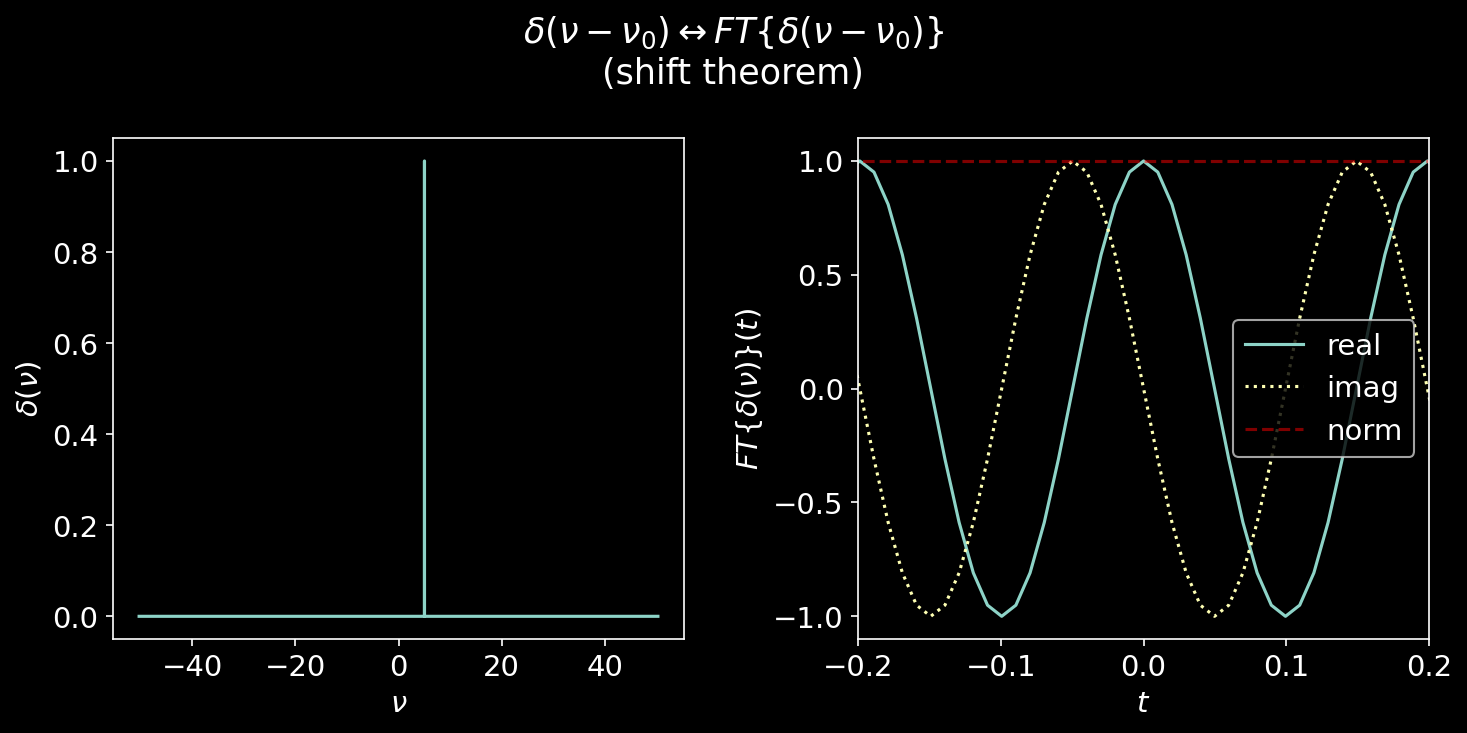

In [6]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.zeros_like(nu)
y[int(np.floor(nu.size*0.05))] = 1
y = np.fft.fftshift(y)
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.set_xlim([-0.2, 0.2]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta (\nu)\}(t)$');
pl.suptitle(r"$\delta(\nu-\nu_0) \leftrightarrow FT\{\delta(\nu-\nu_0)\}$"
            "\n(shift theorem)");
pl.tight_layout()

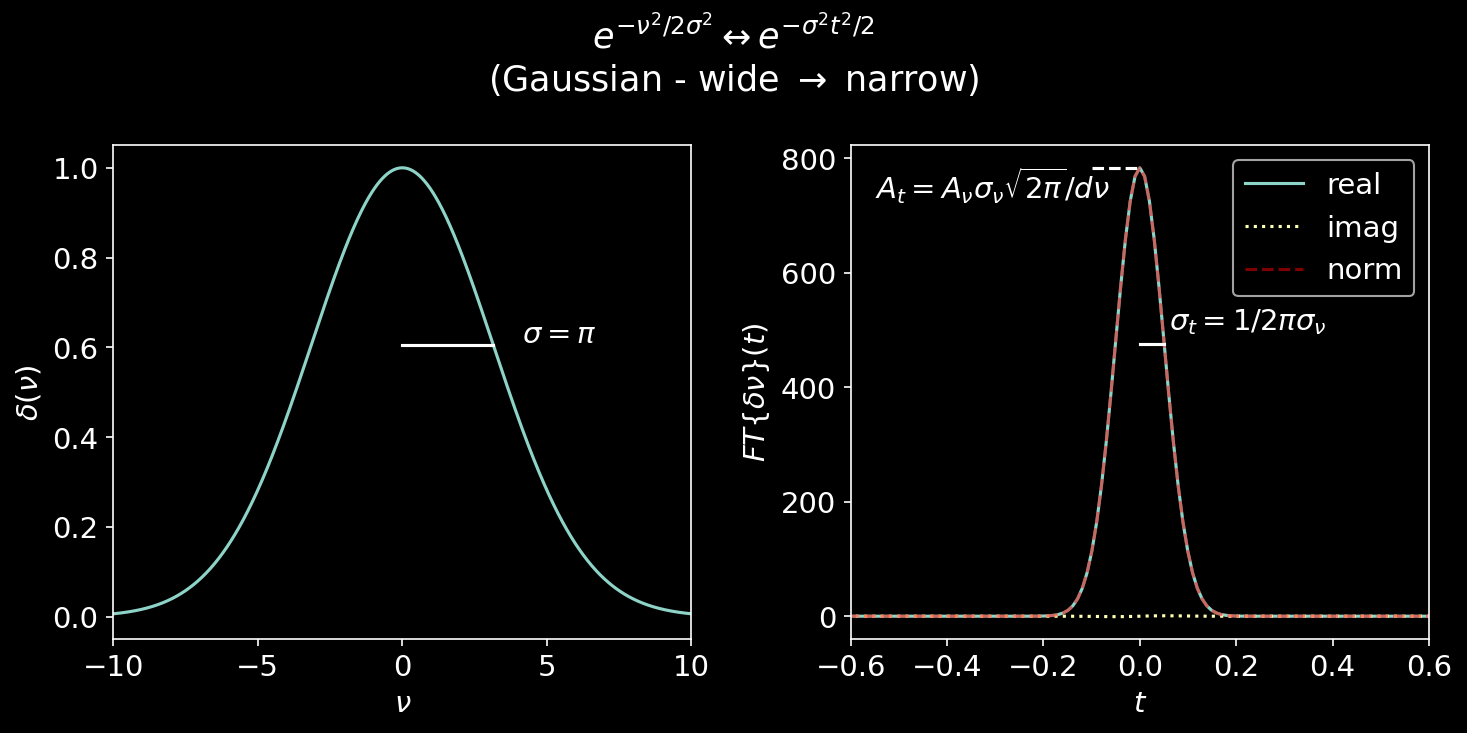

In [7]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1]-nu[0]
y = np.exp(-(nu)**2/(2*np.pi**2))
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax1.plot([0, np.pi], [0.606, 0.606], 'w')
ax1.text(np.pi+1, 0.61, '$\sigma=\pi$')
ax1.set_xlim(-10, 10)
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.set_xlim([-0.6, 0.6]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
ax2.plot([0, 1/(2*np.pi**2)], [0.606*y.sum(), 0.606*y.sum()], 'w')
ax2.text(1/(2*np.pi**2)+0.01, 500, '$\sigma_t=1/2 \pi \sigma_\\nu$')# CORRECT THIS
sigma_t = np.pi
A = 1 * np.sqrt(2*np.pi) * sigma_t / dnu
ax2.plot([-0.1, 0], [A, A], linestyle='--', color='w')
ax2.text(-0.55, A*0.93, r'$A_t=A_\nu \sigma_\nu \sqrt{2 \pi}/ d\nu$')

pl.suptitle(r"$e^{-\nu^2/2\sigma^2} \leftrightarrow e^{-\sigma^2 t^2/2}$"
            "\n(Gaussian - wide $\\rightarrow$ narrow)");
pl.tight_layout()

# PROOF: FT{Gaussian}
$$g(x) = A e ^{-x^2/2\sigma^2}$$
$$FT(f(x)) = G(t) = \int_{-\infty}^\infty f(x) \exp\left[-2\pi i x t\right] dx$$
$$= \int_{-\infty}^\infty A e^{-x^2/2\sigma^2} \exp\left[-2\pi i x t\right] dx$$
$$= \int_{-\infty}^\infty A \exp\left[-x^2/2\sigma^2 -2\pi i x t\right] dx$$
$$= \int_{-\infty}^\infty A \exp\left[\frac{-1}{2\sigma^2}\left(x^2 - 4\pi i x t \sigma^2\right)\right] dx$$
complete the square
$$= \int_{-\infty}^\infty A \exp\left[\frac{-1}{2\sigma^2}\left( \left(x + 2\pi i t \sigma^2\right)^2 + 4 \pi^2 \sigma^4 t^2\right)\right] dx$$
$$= \exp\left[-2 \pi^2 \sigma^2 t^2\right] \int_{-\infty}^\infty A \exp\left[\frac{-1}{2\sigma^2}\left(x - 2\pi i t \sigma^2\right)^2 + \right] dx$$

We know that $\int_{-\infty}^\infty g(x) dx = A \sigma \sqrt{2 \pi}$, independent of translation, so

$$= A\sqrt{2\pi}\sigma \exp\left[-2 \pi^2 \sigma^2 t^2\right] $$

If we define $G(T) = A_t e^{-t^2/2 \sigma_t^2}$, we get $A_t = A \sigma_x \sqrt{2\pi}$ and $\sigma_t = \frac{1}{2\pi\sigma_x}$

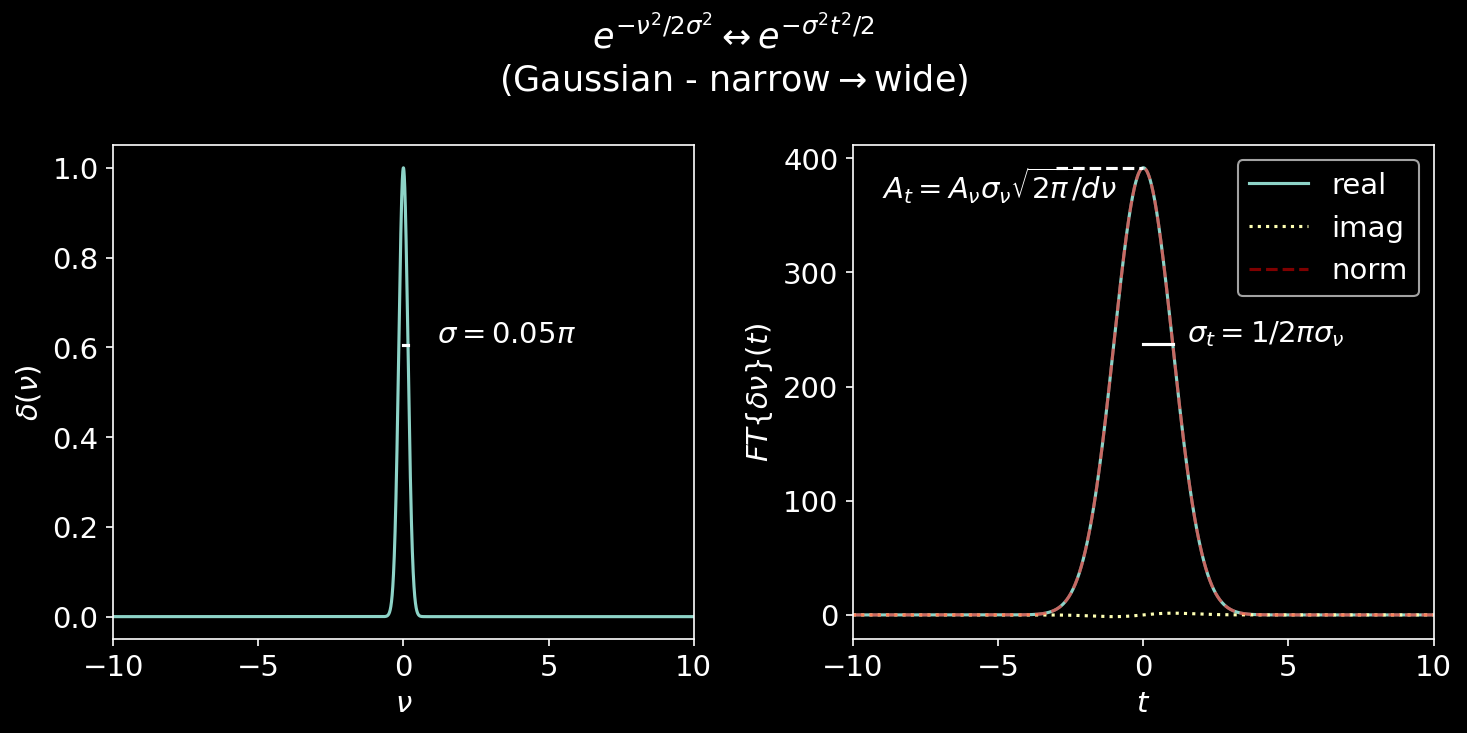

In [8]:
nu = np.linspace(-16*np.pi, 16*np.pi, 100001)
dnu = (nu[1]-nu[0])
sigma_t = (0.05*np.pi)
y = np.exp(-(nu)**2/(2*sigma_t**2))
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')

ax1.plot([0, sigma_t], [0.606, 0.606], 'w')
ax1.text(sigma_t+1, 0.61, '$\sigma=0.05\pi$')
ax1.set_xlim(-10, 10)

ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');

A = 1 * np.sqrt(2*np.pi) * sigma_t / dnu

ax2.plot([0, 1/(2*np.pi * sigma_t)], [0.606*y.sum(), 0.606*y.sum()], 'w')
ax2.text(1/(2*np.pi * sigma_t)+0.5, 0.61*y.sum(), '$\sigma_t=1/2 \pi \sigma_\\nu$')# CORRECT THIS

ax2.plot([-3, 0], [A, A], linestyle='--', color='w')
ax2.text(-9, A*0.93, r'$A_t=A_\nu \sigma_\nu \sqrt{2 \pi}/ d\nu$')
ax2.set_xlim(-10, 10)

pl.suptitle(r"$e^{-\nu^2/2\sigma^2} \leftrightarrow e^{-\sigma^2 t^2/2}$"
            "\n(Gaussian - narrow$\\rightarrow$wide)");
pl.tight_layout()

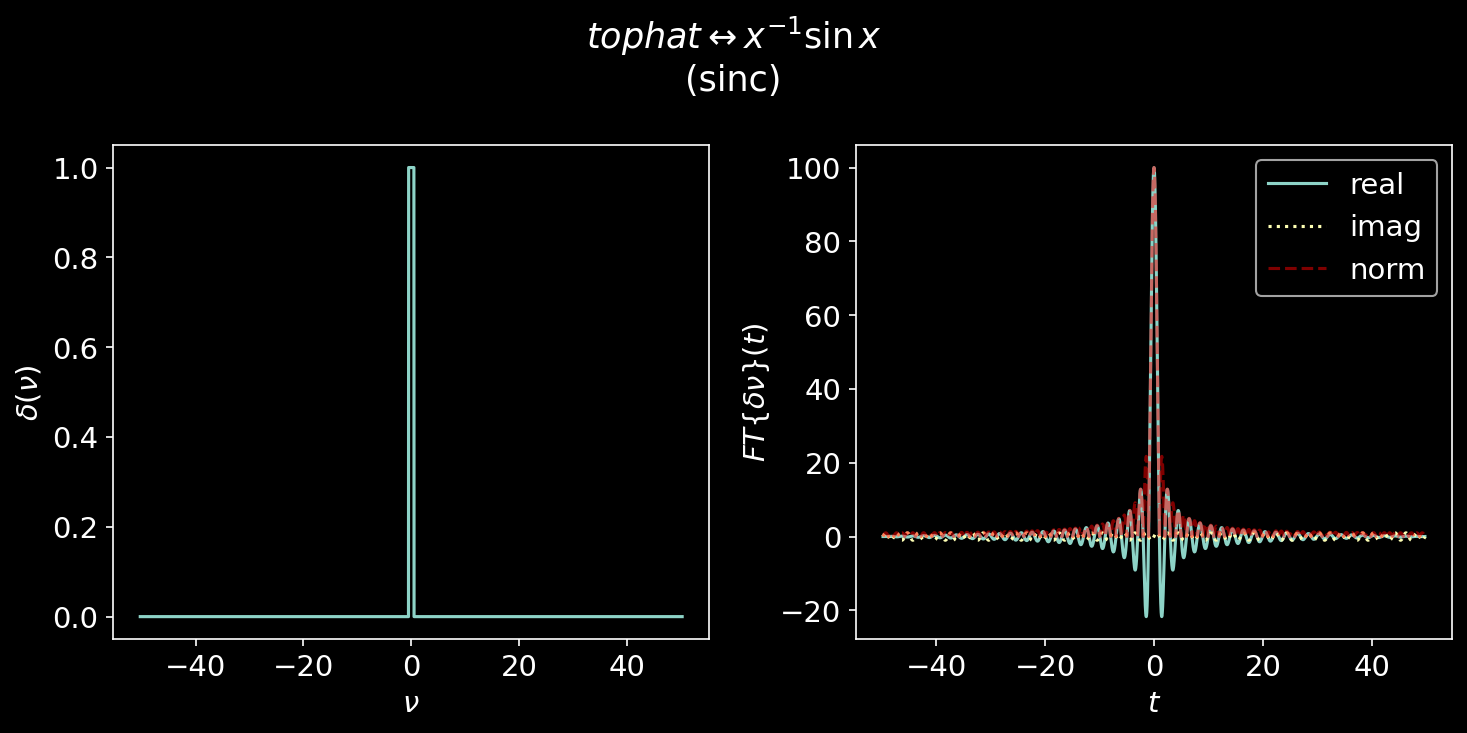

In [9]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.zeros_like(nu)
y[np.abs(nu)<.5] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$tophat \leftrightarrow x^{-1} \sin x$"
            "\n(sinc)");
pl.tight_layout()

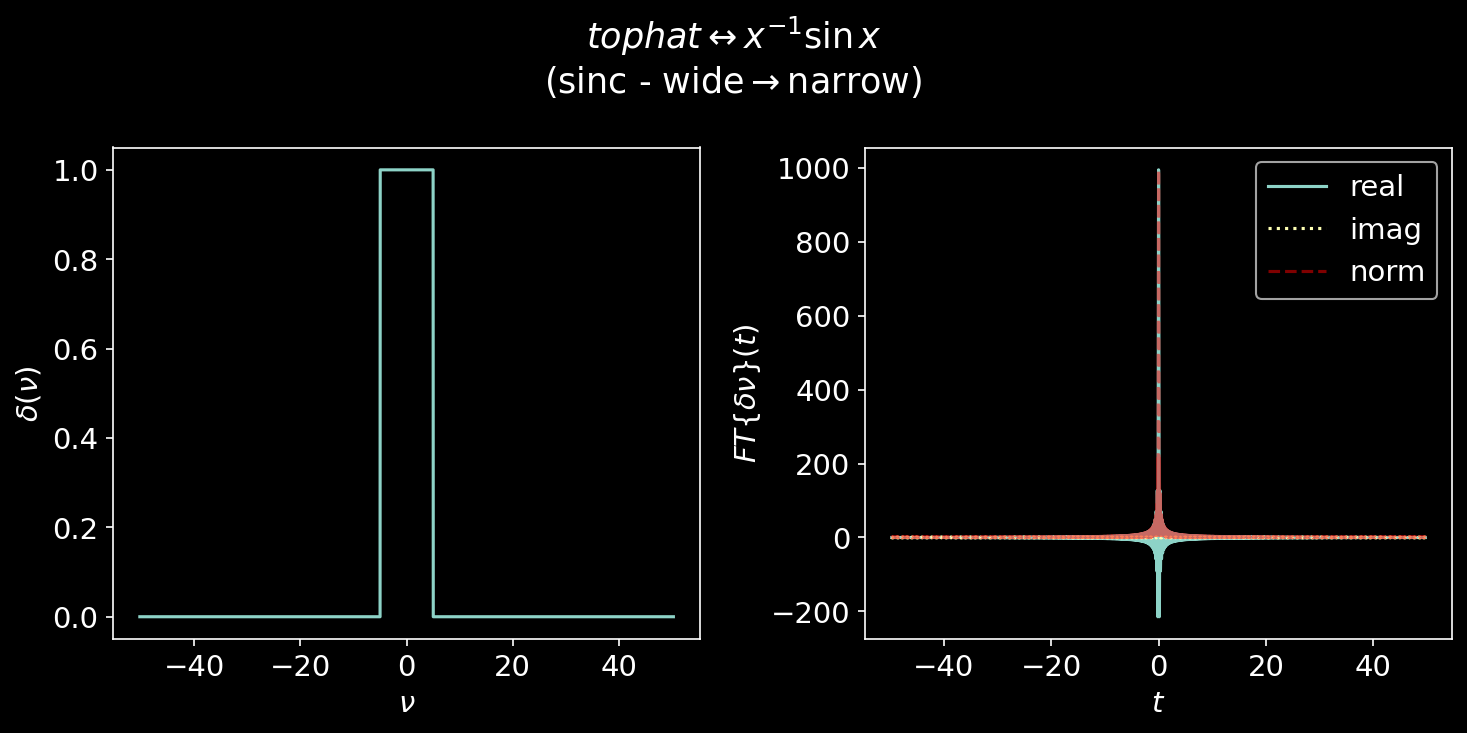

In [10]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.zeros_like(nu)
y[np.abs(nu)<5] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$tophat \leftrightarrow x^{-1} \sin x$"
            "\n(sinc - wide$\\rightarrow$narrow)");
pl.tight_layout()

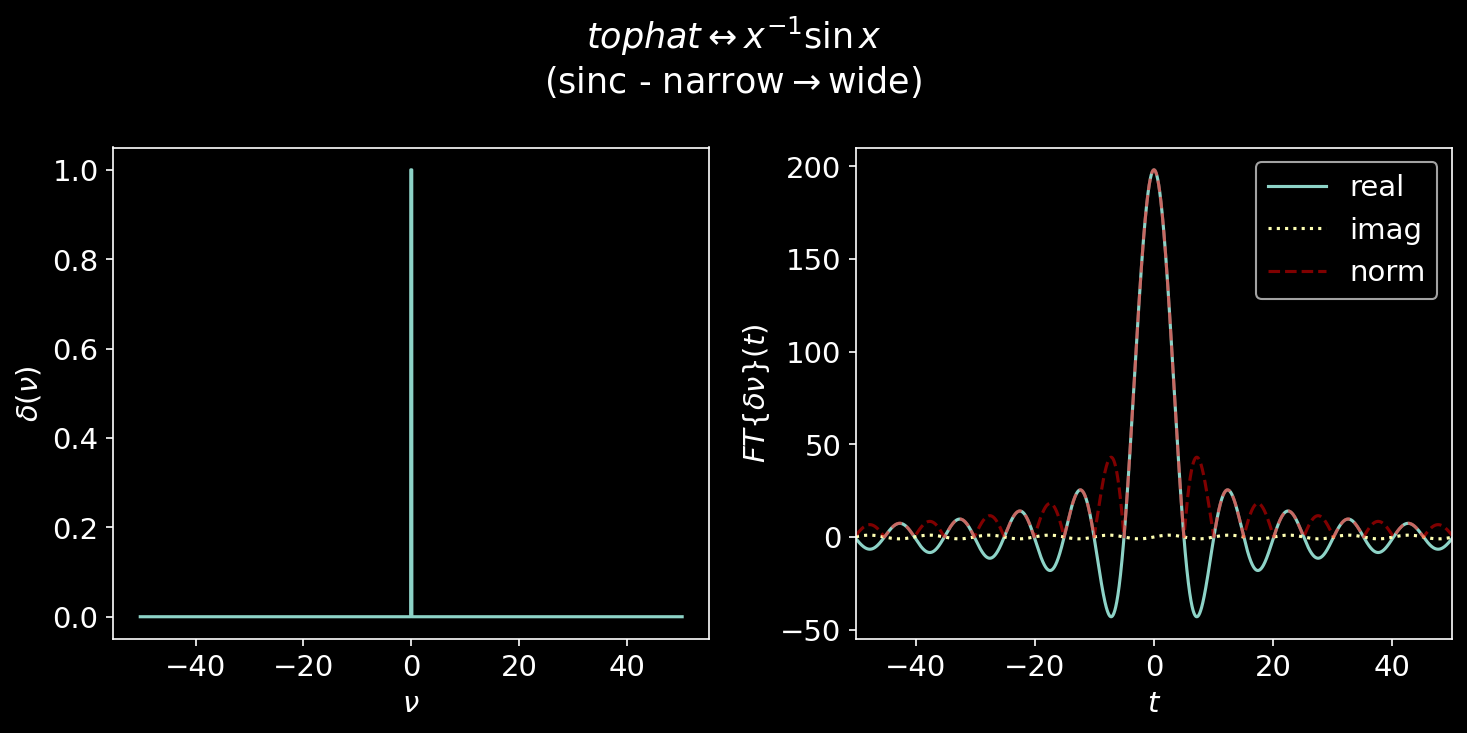

In [11]:
nu = np.linspace(-16*np.pi, 16*np.pi, num=100000)
dnu = nu[1]-nu[0]
y = np.zeros_like(nu)
y[np.abs(nu)<0.1] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / dnu
inds = np.argsort(tee)

pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
ax2.set_xlim([-50, 50]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$tophat \leftrightarrow x^{-1} \sin x$"
            "\n(sinc - narrow$\\rightarrow$wide)");
pl.tight_layout()

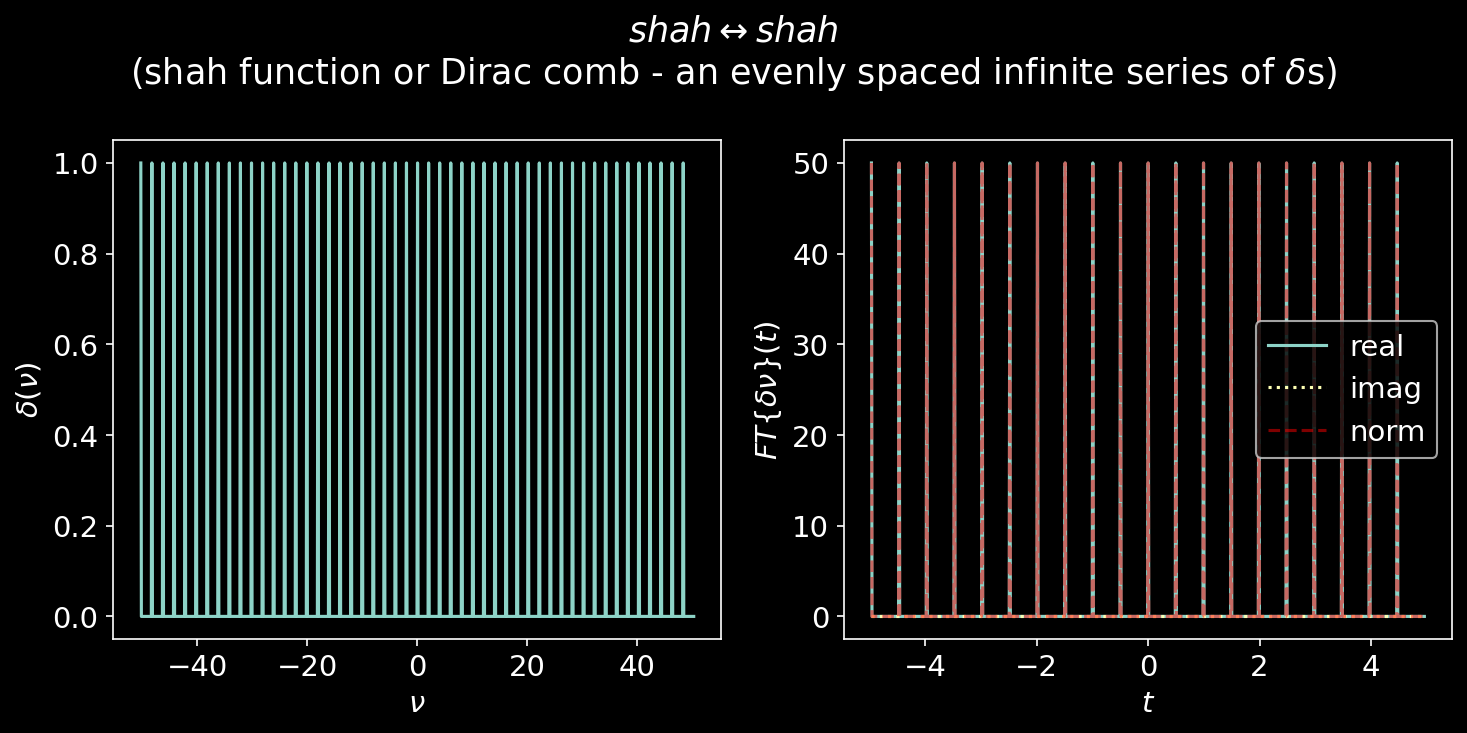

In [12]:
nu = np.linspace(-16*np.pi, 16*np.pi, 1000)
dnu = nu[1]-nu[0]
y = np.zeros_like(nu)
y[::20] = 1
ftx = np.fft.fft(np.fft.fftshift(y))
tee = np.fft.fftfreq(y.size) / dnu
pl.figure(figsize=(10,5), dpi=150)
ax1 = pl.subplot(1,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\delta(\nu)$')
ax2 = pl.subplot(1,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], (ftx[inds]).real, label='real')
ax2.plot(tee[inds], (ftx[inds]).imag, linestyle=':', label='imag')
ax2.plot(tee[inds], np.abs(ftx[inds]), linestyle='--', label='norm', color='r', alpha=0.5)
pl.legend(loc='best')
#ax2.set_xlim([-0.005, 0.005]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\delta \nu\}(t)$');
pl.suptitle(r"$shah \leftrightarrow shah$"
            "\n(shah function or Dirac comb - an evenly spaced infinite series of $\delta$s)");
pl.tight_layout()

# Overview of basic properties

(from Halverson notes)

 * If a function gets wider (narrower) in the time domain, it gets narrower (wider) in the frequency domain
 * If a function is truncated, that is, zero outside some range in the time domain, it will be infinite in extent in the frequency domain.


### DC or Zero-spacing

The zero-frequency component, called the "zero spacing" in interferometry or the Direct Current (DC) in signal processing and electronics, is the integral over the FT domain.

i.e., the value at $f(0)$ is equal to the integral of the Fourier transform: $f(0)=\int_{-\infty}^\infty g(x) dx = \int_{-\infty}^\infty FT\{f(t)\}(x) dx $.

This provides a useful visual check for the amplitude normalization of the function.

### Parceval's Theorem

The integral in the original domain and the Fourier domain are equal.  This equality is known as Parceval's theorem.

For a Fourier transform pair $h(t) = FT\{H(\nu)\}$,

$$ \int_{-\infty}^{\infty} dt | h(t) |^2 = \int_{-\infty}^\infty d\nu |H(\nu)|^2$$

### Linearity

Linearity, or superposition theorem: The FT is a linear operator.

That is, if 
$$h(t) = f(t) + g(t)$$
then
$$H(\nu) = F(\nu) + G(\nu)$$

### Even and Odd

Relationships between even/odd functions and real/imaginary functions in the
Fourier conjugate domain:

 * If $h(t)$ is even, then $H(\nu)$ is real.
 * If $h(t)$ is odd, then $H(\nu)$ is imaginary.
 * If $h(t)$ is real (like sky intensity), then $Re(H(\nu))$ is even, and $Im(H(\nu))$ is odd.
 * If $h(t)$ is imaginary, then $Re(H(\nu))$ is odd, and $Im(H(\nu))$ is even.

 * If $h(t)$ is even, then $H(\nu)$ is real.
 * If $h(t)$ is odd, then $H(\nu)$ is imaginary.
 * If $h(t)$ is real (like sky intensity), then $Re(H(\nu))$ is even, and $Im(H(\nu))$ is odd.
 * If $h(t)$ is imaginary, then $Re(H(\nu))$ is odd, and $Im(H(\nu))$ is even.

To remember these last relationships, recall that to obtain $H(\nu)$, before integrating, you
multiply $h(t)$ by the forward FT kernel,

$$e^{-i2π\nu t} = \cos(2π\nu t) + i \sin(2π \nu t)$$

where $\cos(2π\nu t)$ is a real, even function, and $i sin(2π\nu t)$ is an imaginary, odd function.

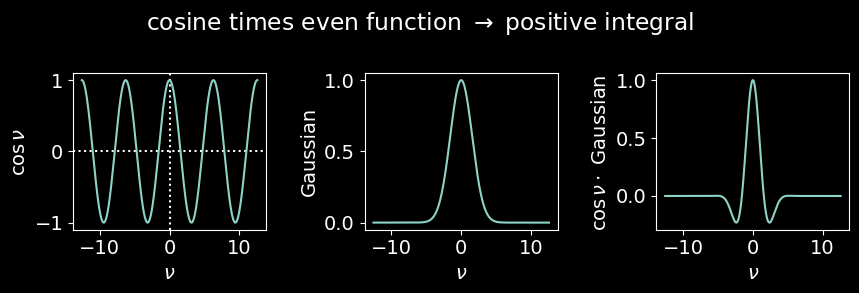

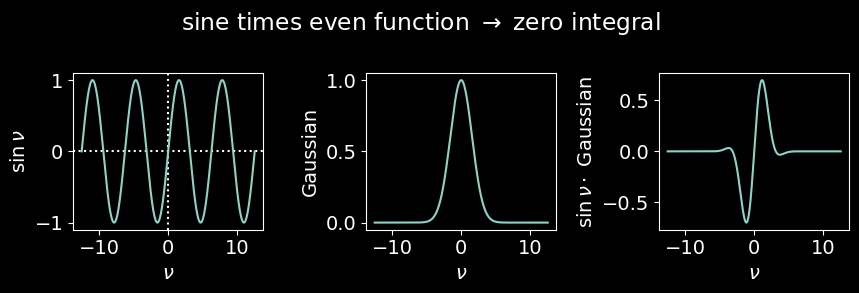

In [60]:
nu = np.linspace(-4*np.pi, 4*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.cos(nu)
z = np.exp(-nu**2/(2*(np.pi/2)**2))

pl.figure(figsize=(9,3))
ax1 = pl.subplot(1,3,1)
ax1.axvline(0, linestyle=':')
ax1.axhline(0, linestyle=':')
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\cos\nu$ ')

ax2 = pl.subplot(1,3,2)
ax2.plot(nu, z)
ax2.set_xlabel(r'$\nu$')
ax2.set_ylabel("Gaussian")

ax3 = pl.subplot(1,3,3)
ax3.plot(nu, z * y)
ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\cos\nu \cdot$ Gaussian ')
pl.suptitle("cosine times even function $\\rightarrow$ positive integral")
pl.tight_layout()

nu = np.linspace(-4*np.pi, 4*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.sin(nu)

pl.figure(figsize=(9,3))
ax1 = pl.subplot(1,3,1)
ax1.axvline(0, linestyle=':')
ax1.axhline(0, linestyle=':')
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\sin\nu$ ')

ax2 = pl.subplot(1,3,2)
ax2.plot(nu, z)
ax2.set_xlabel(r'$\nu$')
ax2.set_ylabel("Gaussian")

ax3 = pl.subplot(1,3,3)
ax3.plot(nu, z * y)
ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\sin\nu \cdot$ Gaussian ')
pl.suptitle("sine times even function $\\rightarrow$ zero integral")
pl.tight_layout()

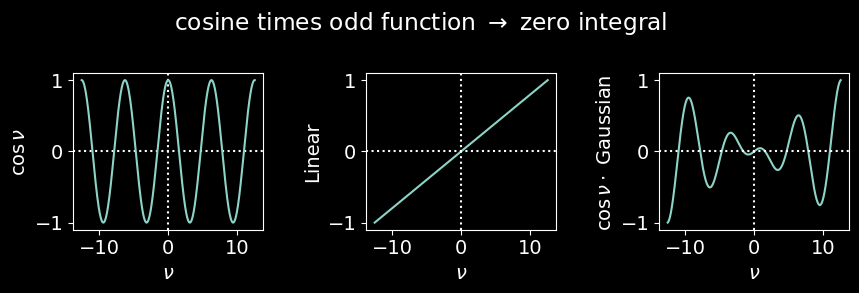

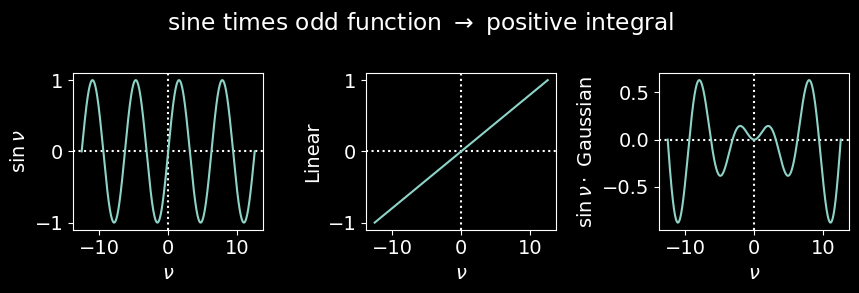

In [61]:
nu = np.linspace(-4*np.pi, 4*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.cos(nu)
z = nu/nu.max()

pl.figure(figsize=(9,3))
ax1 = pl.subplot(1,3,1)
ax1.axvline(0, linestyle=':')
ax1.axhline(0, linestyle=':')
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\cos\nu$ ')

ax2 = pl.subplot(1,3,2)
ax2.plot(nu, z)
ax2.axvline(0, linestyle=':')
ax2.axhline(0, linestyle=':')

ax2.set_xlabel(r'$\nu$')
ax2.set_ylabel("Linear")

ax3 = pl.subplot(1,3,3)
ax3.plot(nu, z * y)
ax3.axvline(0, linestyle=':')
ax3.axhline(0, linestyle=':')

ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\cos\nu \cdot$ Gaussian ')
pl.suptitle("cosine times odd function $\\rightarrow$ zero integral")
pl.tight_layout()

nu = np.linspace(-4*np.pi, 4*np.pi, 10000)
dnu = nu[1] - nu[0]
y = np.sin(nu)

pl.figure(figsize=(9,3))
ax1 = pl.subplot(1,3,1)
ax1.axvline(0, linestyle=':')
ax1.axhline(0, linestyle=':')
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\sin\nu$ ')

ax2 = pl.subplot(1,3,2)
ax2.axvline(0, linestyle=':')
ax2.axhline(0, linestyle=':')

ax2.plot(nu, z)
ax2.set_xlabel(r'$\nu$')
ax2.set_ylabel("Linear")

ax3 = pl.subplot(1,3,3)
ax3.axvline(0, linestyle=':')
ax3.axhline(0, linestyle=':')
ax3.plot(nu, z * y)
ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\sin\nu \cdot$ Gaussian ')
pl.suptitle("sine times odd function $\\rightarrow$ positive integral")
pl.tight_layout()

# Convolution

The convolution of two functions $g(t), h(t)$
 is given by

$$y(t)=g(t)∗h(t)≡\int_{-\infty}^\infty dt' g(t')h(t−t')$$


Conceptually, to calculate the convolution at some time $t$, we fold (flip) the function $h$ in the time axis about the y-axis, offset it by amount $t$, and take the overlap integral, or area, of functions $g$ and the flipped $h(-t)$.

Visual demonstration of convolution:

In [127]:
def g(t):
    return (t > 0)*0.5
def h(t):
    return t**2 * (t>0) * (t < 1)

In [136]:
def hconvt(t):
    return 0.5 * (1/3 * (t)**3 * ((t>0) & (t<1)) + (t>=1) / 3)

<IPython.core.display.Math object>

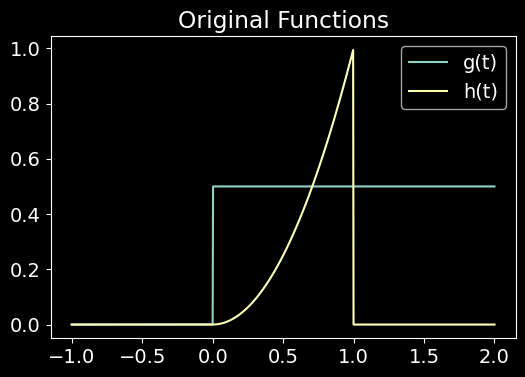

In [137]:
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(t), label='h(t)')
pl.legend(loc='best');
pl.title("Original Functions");
from IPython.display import display, Math
Math("$h(t) * g(t)$")

<IPython.core.display.Math object>

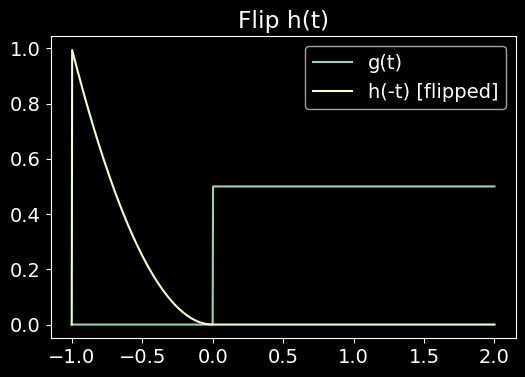

In [138]:
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(-t), label='h(-t) [flipped]')
pl.legend(loc='best');
pl.title("Flip h(t)");
Math("$$g(t)∗h(t)≡\int_{-\infty}^\infty dt' g(t')\color{red}{h(t−t')}$$")

<IPython.core.display.Math object>

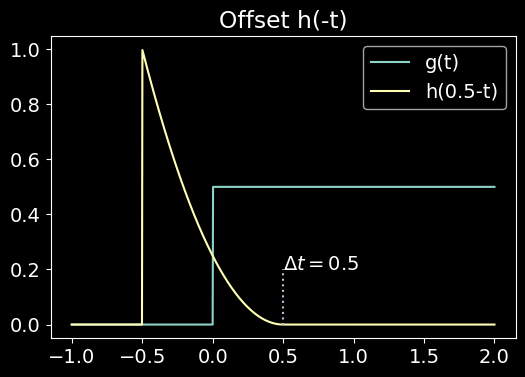

In [139]:
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(0.5-t), label='h(0.5-t)')
pl.plot([0.5, 0.5,], [0, 0.2], linestyle=':')
pl.text(0.5, 0.2, "$\Delta t=0.5$")
pl.legend(loc='best');
pl.title("Offset h(-t)");
Math("$$g(t)∗h(t)≡\int_{-\infty}^\infty dt' g(t')\color{red}{h(t−t')}$$")

In [140]:
def overlap_hg(t, dt):
    tmdt = dt - t
    hflip = (tmdt)**2 * (tmdt>0) * (tmdt < 1)
    return hflip * g(t)

<IPython.core.display.Math object>

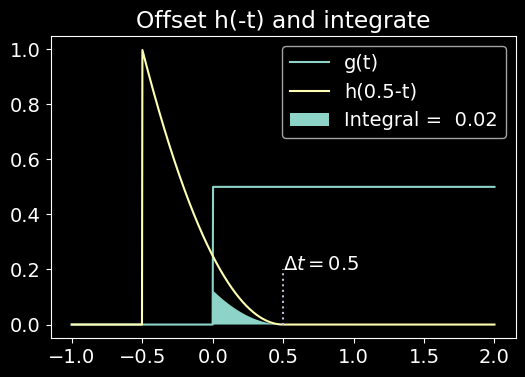

In [141]:
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(0.5-t), label='h(0.5-t)')
pl.fill_between(t, t*0, overlap_hg(t, 0.5), label=f'Integral = {hconvt(0.5): 0.2f}')
pl.plot([0.5, 0.5,], [0, 0.2], linestyle=':')
pl.text(0.5, 0.2, "$\Delta t=0.5$")

pl.legend(loc='best');
pl.title("Offset h(-t) and integrate");
Math("$$g(t)∗h(t)≡ \color{red}{\int_{-\infty}^\infty dt'} g(t') h(t−t')$$")

<IPython.core.display.Math object>

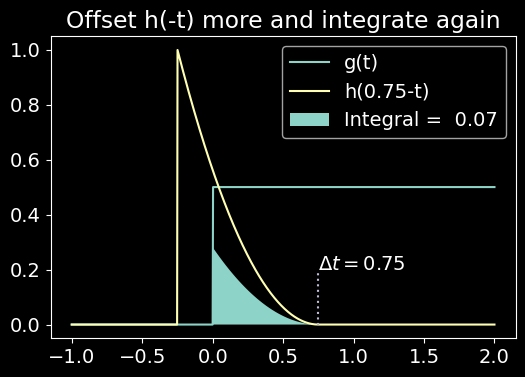

In [142]:
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(0.75-t), label='h(0.75-t)')
pl.fill_between(t, t*0, overlap_hg(t, 0.75), label=f'Integral = {hconvt(0.75): 0.2f}')

pl.plot([0.75, 0.75,], [0, 0.2], linestyle=':')
pl.text(0.75, 0.2, "$\Delta t=0.75$")

pl.legend(loc='best');
pl.title("Offset h(-t) more and integrate again");
Math("$$g(t)∗h(t)≡ \color{red}{\int_{-\infty}^\infty dt'} g(t') h(t−t')$$")

<IPython.core.display.Math object>

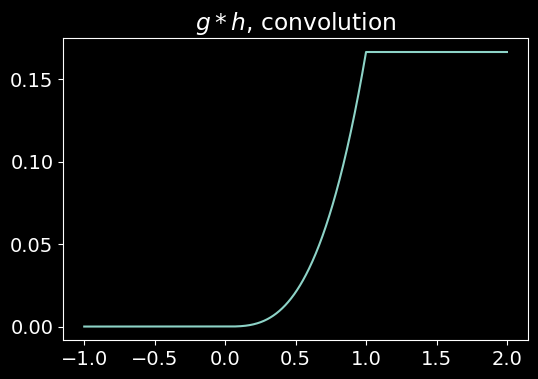

In [147]:
pl.plot(t, hconvt(t));
# manual verification:
#pl.plot(t, [overlap_hg(t, dt).sum() * (t[1]-t[0]) for dt in t], linestyle=':')
pl.title("$g * h$, convolution");
Math("$$g(t)∗h(t)$$")

All together now:

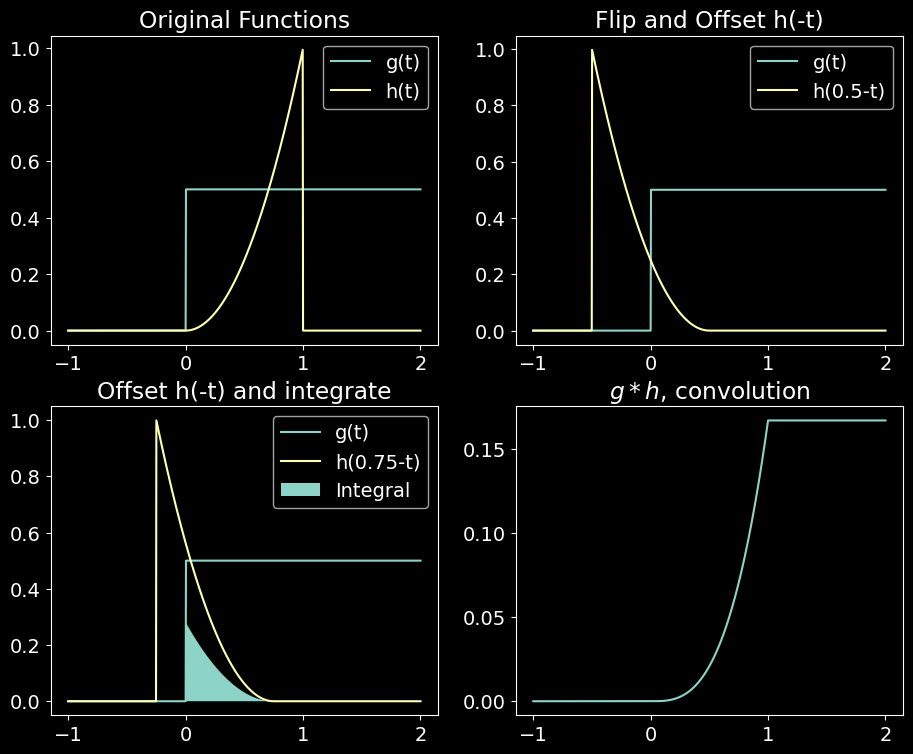

In [144]:
pl.figure(figsize=(11, 9), dpi=100)
t = np.linspace(-1, 2, 1000)
pl.subplot(2,2,1)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(t), label='h(t)')
pl.legend(loc='best');
pl.title("Original Functions");
pl.subplot(2,2,2)
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(0.5-t), label='h(0.5-t)')
pl.legend(loc='best');
pl.title("Flip and Offset h(-t)");
pl.subplot(2,2,3)
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(0.75-t), label='h(0.75-t)')
pl.fill_between(t, t*0, overlap_hg(t, 0.75), label='Integral')
pl.legend(loc='best');
pl.title("Offset h(-t) and integrate");
pl.subplot(2,2,4)
pl.plot(t, hconvt(t));
pl.title("$g * h$, convolution");

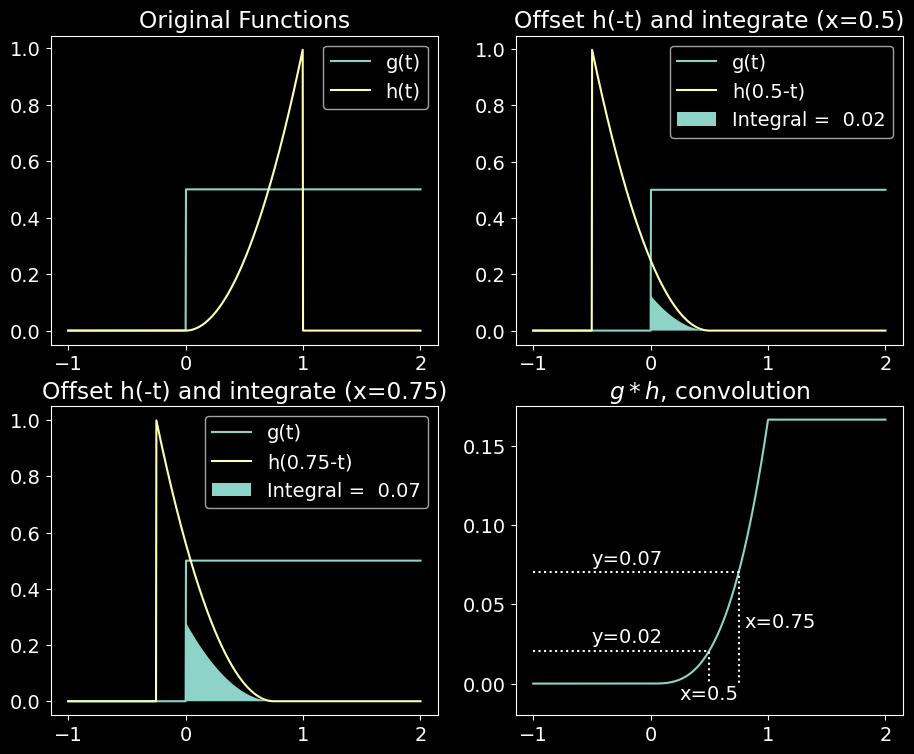

In [153]:
pl.figure(figsize=(11, 9), dpi=100)
t = np.linspace(-1, 2, 1000)
pl.subplot(2,2,1)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(t), label='h(t)')
pl.legend(loc='best');
pl.title("Original Functions");
pl.subplot(2,2,2)
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(0.5-t), label='h(0.5-t)')
pl.fill_between(t, t*0, overlap_hg(t, 0.5), label=f'Integral = {hconvt(0.5): 0.2f}')

pl.legend(loc='best');
pl.title("Offset h(-t) and integrate (x=0.5)");
pl.subplot(2,2,3)
t = np.linspace(-1, 2, 1000)
pl.plot(t, g(t), label='g(t)')
pl.plot(t, h(0.75-t), label='h(0.75-t)')
pl.fill_between(t, t*0, overlap_hg(t, 0.75), label=f'Integral = {hconvt(0.75): 0.2f}')

pl.legend(loc='best');
pl.title("Offset h(-t) and integrate (x=0.75)");
pl.subplot(2,2,4)
pl.plot(t, hconvt(t));
pl.plot([-1,0,0.75,0.75], [hconvt(0.75), hconvt(0.75), hconvt(0.75), 0], linestyle=':', color='w')
pl.text(-0.5, hconvt(0.75)+0.005, f"y={hconvt(0.75):0.2f}")
pl.text(0.8, hconvt(0.75)/2, f"x=0.75")

pl.plot([-1,0,0.5,0.5], [hconvt(0.5), hconvt(0.5), hconvt(0.5), 0], linestyle=':', color='w')
pl.text(-0.5, hconvt(0.5)+0.005, f"y={hconvt(0.5):0.2f}")
pl.text(0.5, -0.01, "x=0.5", ha='center')
ylim = pl.ylim()
pl.ylim(-0.02, ylim[1])

pl.title("$g * h$, convolution");

### Convolution: Practical Examples

In any linear system, e.g., a measurement device with linear response (so think of a detector where the value it puts out is linearly proportional to the energy put in), the convolution can model the _response_ of the system to a given _input_.



In this context, you would think of $g(t)$ as the input and $h(t)$ as the _response_ to an infinitesimal impulse (a Dirac Delta input) or the _transfer function_.


Then, $g(t)*h(t)$ is the output of the system.



Then, the system output at some time $t$ is the sum of the Delta function response ($h(t)$) over all time lags multiplied by the input $g$ at those time lags.

In [146]:
def g2(t):
    return np.isin(t, [5, 350, 500, 550, 700])
def h2(t):
    return (((200-t)/200)**2 * (t>0) * (t < 200))
def hconvt2(t):
    return np.fft.ifft(np.fft.fft(g2(t)) *
                       np.fft.fft(h2(t))).real

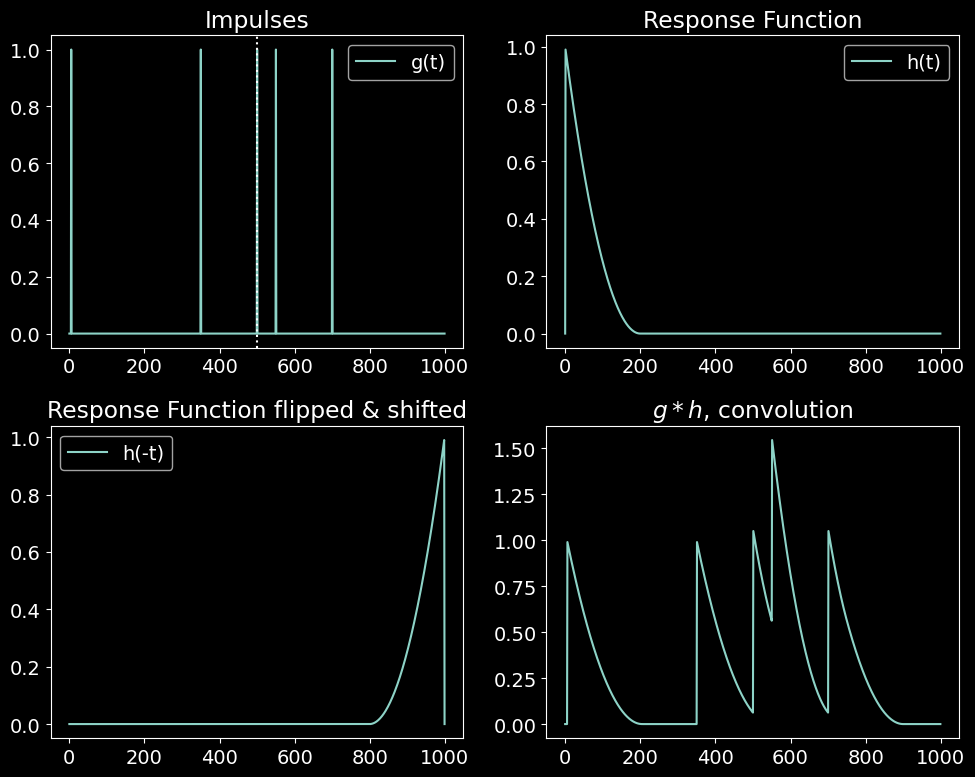

In [24]:
ts = np.arange(1000)


pl.figure(figsize=(10, 8), dpi=100)
pl.subplot(2,2,1)
pl.plot(ts, g2(ts), label='g(t)')
pl.axvline(500, linestyle=':')

pl.legend(loc='best');
pl.title("Impulses");
pl.subplot(2,2,2)

pl.plot(ts, h2(ts), label='h(t)')
pl.legend(loc='best');
pl.title("Response Function");

pl.subplot(2,2,3)
pl.plot(ts, h2(ts[::-1]), label='h(-t)')
pl.legend(loc='best');
pl.title("Response Function flipped & shifted");

pl.subplot(2,2,4)
pl.plot(ts, hconvt2(ts));
pl.title("$g * h$, convolution");
pl.tight_layout()

Another example of a convolution is a simple optical system. 

The focal plane image is
the *true* sky brightness distribution $I_{sky}(\theta, \phi)$ convolved with the telescope response function, the PSF:
$$I_{\mathrm{focal~plane}}(\theta, \phi) = \int\int d\Omega I_{sky}(\theta', \phi') A(\theta-\theta', \phi-\phi')$$
where $A(\theta-\theta', \phi-\phi')$ is the telescope response function (point spread function). In
this case, the convolution is 2-dimensional. 

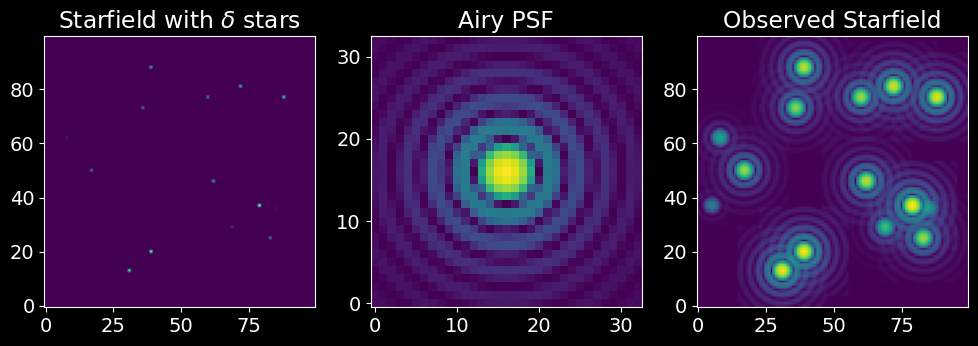

In [25]:
from astropy.convolution import convolve, AiryDisk2DKernel
from astropy.visualization import simple_norm
starfield = np.zeros([100,100])
psf = AiryDisk2DKernel(4)
starfield.flat[np.random.randint(0, starfield.size, 15)] = np.random.rand(15)
pl.figure(figsize=(10,5))
pl.subplot(1,3,1)
pl.imshow(starfield)
pl.title("Starfield with $\delta$ stars")
pl.subplot(1,3,2)
pl.imshow(psf.array, norm=simple_norm(psf.array, stretch='log'))
pl.title("Airy PSF")
pl.subplot(1,3,3)
conv_starfield = convolve(starfield, psf)
pl.imshow(conv_starfield, norm=simple_norm(conv_starfield, stretch='log'))
pl.title("Observed Starfield")
pl.tight_layout()

# Convolution Theorem

The convolution in frequency is equal to the Fourier transform of the product in time.

$$FT\{g(t) ∗ h(t)\} = G(f) · H(f)$$

We'll demonstrate and use this.

Notational clarification / reminder:

$$FT\{g(t)\} \equiv G(f) $$
so
$$FT\{g(t) ∗ h(t)\} = FT\{g(t)\} · FT\{h(t)\}$$


Since multiplication is commutative, and the Fourier transform is a linear operation, the convolution theorem also implies that convolution is commutative, i.e.:

$$g(t) * h(t) = h(t) * g(t)$$

# Visual Fourier Transforms using the Convolution theorem

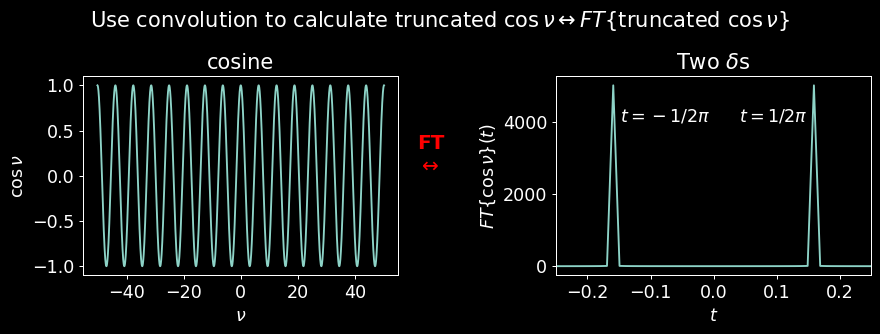

In [167]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.cos(nu)
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
fig = pl.figure(figsize=(10,10), dpi=90)
ax1 = pl.subplot(3,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\cos\nu$')
ax1.set_title("cosine")

ax2 = pl.subplot(3,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], np.abs(ftx[inds]))
ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
ax2.set_xlim([-0.25, 0.25]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\cos \nu\}(t)$');
ax2.set_title(r"Two $\delta$s")

# ax3 = pl.subplot(3,2,3)
# trunc = (nu > -4*np.pi) & (nu < 4*np.pi)
# ax3.plot(nu, trunc)
# ax3.set_xlabel('$\\nu$')
# ax3.set_ylabel(r'Boxcar');
# 
# 
# ax5 = pl.subplot(3,2,5)
# ax5.plot(nu, trunc * y)
# ax5.set_xlabel('$\\nu$')
# ax5.set_ylabel(r'$\cos \nu \cdot Boxcar$');
# 
# 
# ax4 = pl.subplot(3,2,4)
# inds = np.argsort(tee)
# ftx2 = np.fft.fft(trunc)
# ax4.plot(tee[inds], np.abs(ftx2[inds]), )
# ax4.set_xlim([-0.25, 0.25]);
# ax4.set_xlabel('$t$')
# 
# ax4.set_ylabel(r'$FT\{Boxcar\}(t)$');
# 
# 
# ax6 = pl.subplot(3,2,6)
# inds = np.argsort(tee)
# ftx3 = np.fft.fft(trunc*y)
# ax6.plot(tee[inds], np.abs(ftx3[inds]), )
# ax6.set_xlim([-0.4, 0.4]);
# ax6.set_ylabel(r'$FT\{\cos \nu \cdot Boxcar\}(t)$');
# ax6.set_xlabel('$t$')


pl.suptitle(r"Use convolution to calculate truncated $\cos\nu \leftrightarrow FT\{\mathrm{truncated~}\cos \nu\}$");
pl.tight_layout()
pl.subplots_adjust(wspace=0.5, hspace=0.5);
pl.text(0.475, 0.8, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.475, 0.5, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.475, 0.1, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.27, 0.62, "$\cdot$ [multiplication]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.8, 0.62, "$*$ [convolution]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.27, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.8, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);

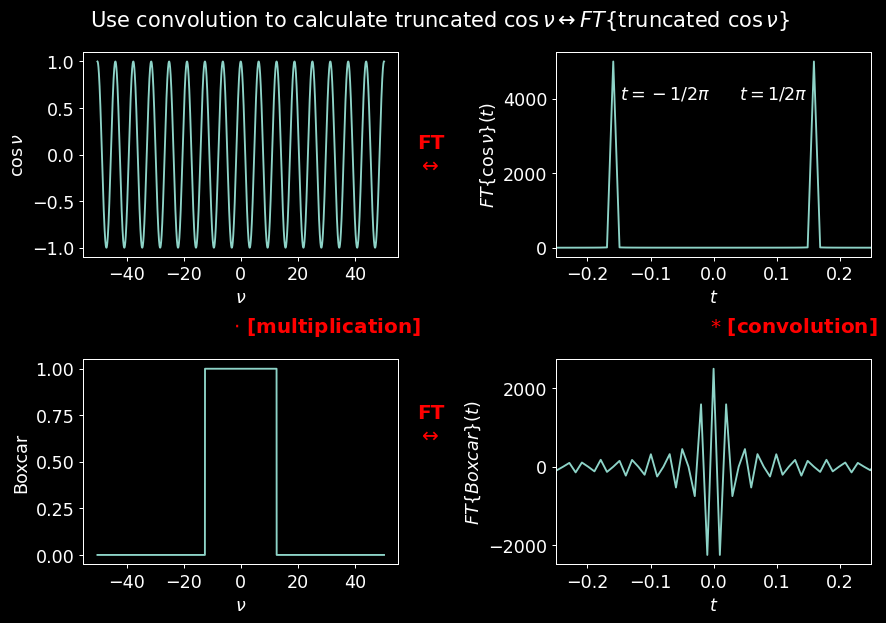

In [169]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.cos(nu)
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
fig = pl.figure(figsize=(10,10), dpi=90)
ax1 = pl.subplot(3,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\cos\nu$')

ax2 = pl.subplot(3,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], np.abs(ftx[inds]))
ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
ax2.set_xlim([-0.25, 0.25]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\cos \nu\}(t)$');

ax3 = pl.subplot(3,2,3)
trunc = (nu > -4*np.pi) & (nu < 4*np.pi)
ax3.plot(nu, trunc)
ax3.set_xlabel('$\\nu$')
ax3.set_ylabel(r'Boxcar');


#ax5 = pl.subplot(3,2,5)
#ax5.plot(nu, trunc * y)
#ax5.set_xlabel('$\\nu$')
#ax5.set_ylabel(r'$\cos \nu \cdot Boxcar$');


ax4 = pl.subplot(3,2,4)
inds = np.argsort(tee)
ftx2 = np.fft.fft(trunc)
ax4.plot(tee[inds], (ftx2[inds]).real )
ax4.set_xlim([-0.25, 0.25]);
ax4.set_xlabel('$t$')

ax4.set_ylabel(r'$FT\{Boxcar\}(t)$');


# ax6 = pl.subplot(3,2,6)
# inds = np.argsort(tee)
# ftx3 = np.fft.fft(trunc*y)
# ax6.plot(tee[inds], np.abs(ftx3[inds]), )
# ax6.set_xlim([-0.4, 0.4]);
# ax6.set_ylabel(r'$FT\{\cos \nu \cdot Boxcar\}(t)$');
# ax6.set_xlabel('$t$')


pl.suptitle(r"Use convolution to calculate truncated $\cos\nu \leftrightarrow FT\{\mathrm{truncated~}\cos \nu\}$");
pl.tight_layout()
pl.subplots_adjust(wspace=0.5, hspace=0.5)
pl.text(0.475, 0.8, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.5, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.475, 0.1, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.62, "$\cdot$ [multiplication]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.62, "$*$ [convolution]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.27, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
#pl.text(0.8, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);

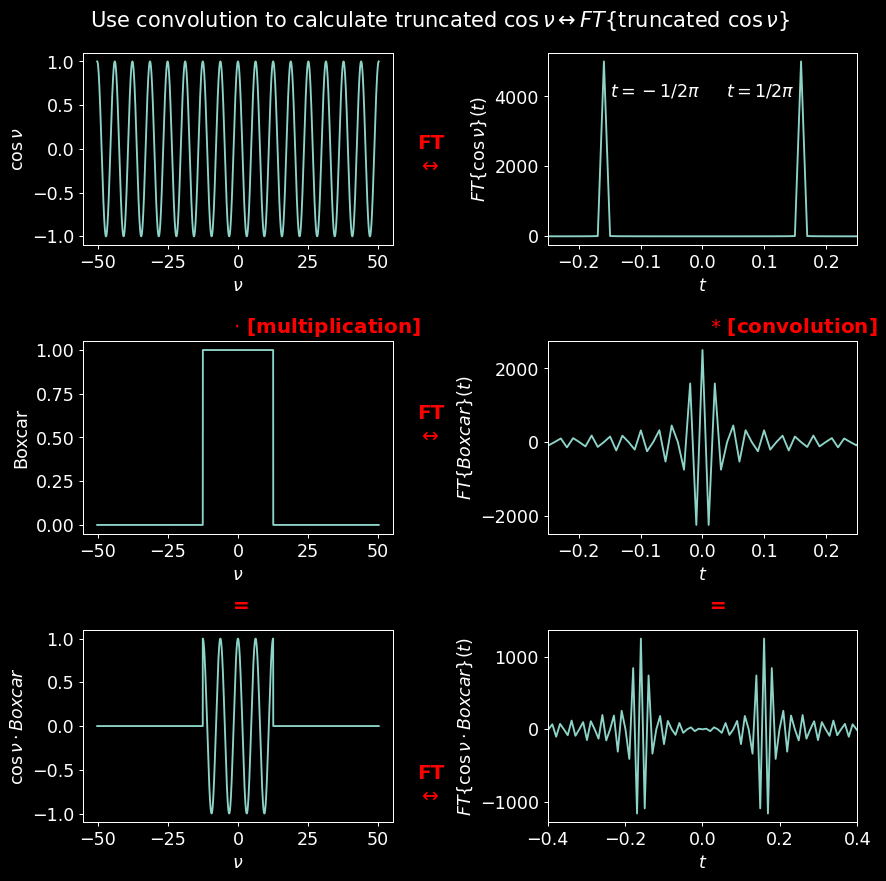

In [170]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.cos(nu)
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
fig = pl.figure(figsize=(10,10), dpi=90)
ax1 = pl.subplot(3,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'$\cos\nu$')

ax2 = pl.subplot(3,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], np.abs(ftx[inds]))
ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
ax2.set_xlim([-0.25, 0.25]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{\cos \nu\}(t)$');

ax3 = pl.subplot(3,2,3)
trunc = (nu > -4*np.pi) & (nu < 4*np.pi)
ax3.plot(nu, trunc)
ax3.set_xlabel('$\\nu$')
ax3.set_ylabel(r'Boxcar');


ax5 = pl.subplot(3,2,5)
ax5.plot(nu, trunc * y)
ax5.set_xlabel('$\\nu$')
ax5.set_ylabel(r'$\cos \nu \cdot Boxcar$');


ax4 = pl.subplot(3,2,4)
inds = np.argsort(tee)
ftx2 = np.fft.fft(trunc)
ax4.plot(tee[inds], (ftx2[inds]).real, )
ax4.set_xlim([-0.25, 0.25]);
ax4.set_xlabel('$t$')

ax4.set_ylabel(r'$FT\{Boxcar\}(t)$');


ax6 = pl.subplot(3,2,6)
inds = np.argsort(tee)
ftx3 = np.fft.fft(trunc*y)
ax6.plot(tee[inds], (ftx3[inds]).real, )
ax6.set_xlim([-0.4, 0.4]);
ax6.set_ylabel(r'$FT\{\cos \nu \cdot Boxcar\}(t)$');
ax6.set_xlabel('$t$')


pl.suptitle(r"Use convolution to calculate truncated $\cos\nu \leftrightarrow FT\{\mathrm{truncated~}\cos \nu\}$");
pl.tight_layout()
pl.subplots_adjust(wspace=0.5, hspace=0.5)
pl.text(0.475, 0.8, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.5, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.1, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.62, "$\cdot$ [multiplication]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.62, "$*$ [convolution]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);

We can do the same for any function.

What if we want to model a telescope aperture with a hole in the middle?

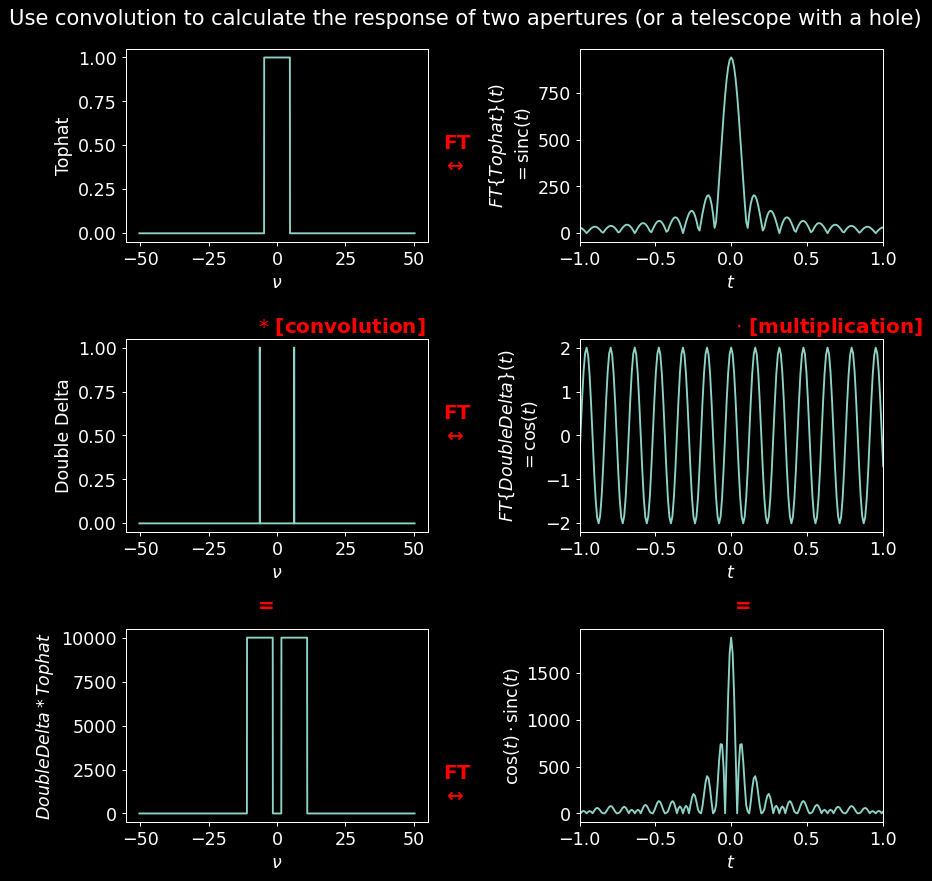

In [159]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = ((nu > -1.5*np.pi) & (nu < 1.5*np.pi))# | ((nu > np.pi) & (nu < 2*np.pi))
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])

fig = pl.figure(figsize=(10,10), dpi=90)
ax1 = pl.subplot(3,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'Tophat')

ax2 = pl.subplot(3,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], np.abs(ftx[inds]))
#ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
#ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
ax2.set_xlim([-1, 1]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{Tophat\}(t)$'
               '\n$=\mathrm{sinc}(t)$');

ax3 = pl.subplot(3,2,3)
deltas = np.zeros_like(y)
deltas[np.argmin(np.abs(nu-2*np.pi))] = 1
deltas[np.argmin(np.abs(nu+2*np.pi))] = 1
ax3.plot(nu, deltas)
ax3.set_xlabel('$\\nu$')
ax3.set_ylabel(r'Double Delta');


ax5 = pl.subplot(3,2,5)
ax5.plot(nu, np.fft.fftshift(np.fft.fft(np.fft.fft(np.fft.fftshift(deltas)) * np.fft.fft(np.fft.fftshift(y)))))
ax5.set_xlabel('$\\nu$')
ax5.set_ylabel(r'$Double Delta * Tophat$');


ax4 = pl.subplot(3,2,4)
inds = np.argsort(tee)
ftx2 = np.fft.fft(np.fft.fftshift(deltas))
ax4.plot(tee[inds], (ftx2[inds]).real )
ax4.set_xlim([-1, 1]);
ax4.set_xlabel('$t$')

ax4.set_ylabel(r'$FT\{Double Delta\}(t)$'
               '\n$=\\cos(t)$');


ax6 = pl.subplot(3,2,6)
inds = np.argsort(tee)
ftx3 = np.fft.fft(np.fft.fftshift(deltas))*np.fft.fft(np.fft.fftshift(y))
ax6.plot(tee[inds], np.abs(ftx3[inds]).real, )
ax6.set_xlim([-1, 1]);
ax6.set_ylabel(r'$\cos(t) \cdot \mathrm{sinc}(t)$');
ax6.set_xlabel('$t$')



pl.suptitle(r"Use convolution to calculate the response of two apertures (or a telescope with a hole)");
pl.tight_layout()
pl.subplots_adjust(wspace=0.5, hspace=0.5)
pl.text(0.475, 0.8, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.5, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.1, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.62, "$*$ [convolution]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.62, "$\cdot$ [multiplication]",  transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);

One of the most important use cases of the convolution theorem is the _sampling theorem_.

What happens if we discretize our measurement?  i.e., we only take samples at regular intervals?


We model this with the shah function

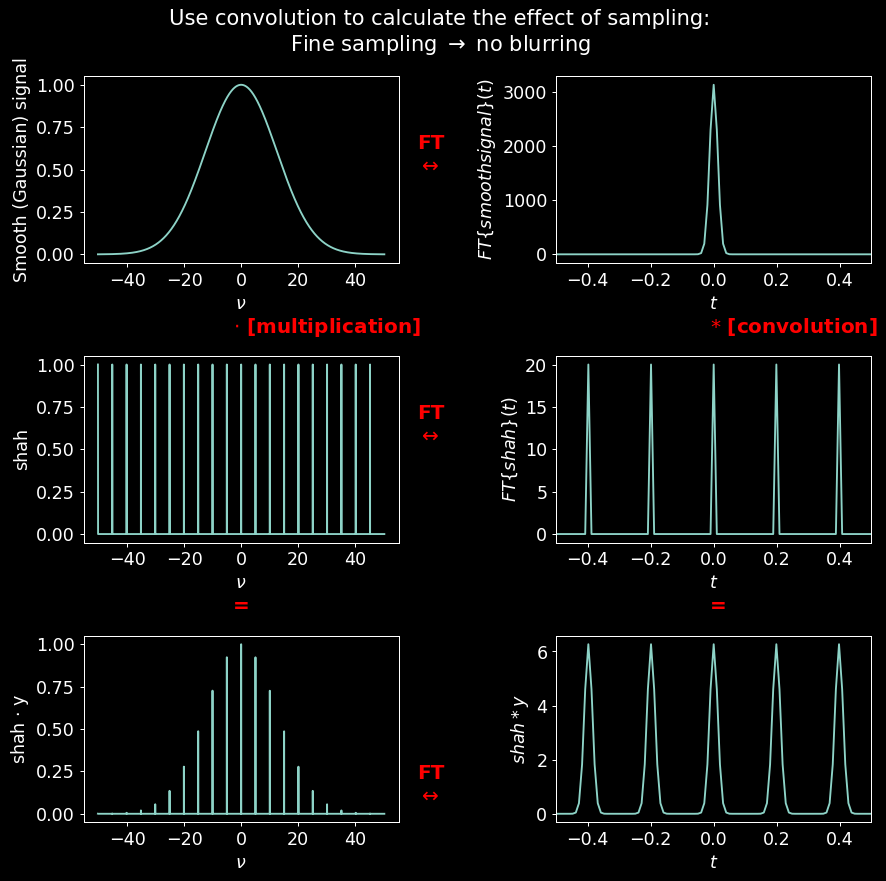

In [160]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.exp(-nu**2/(2*(4*np.pi)**2))
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
fig = pl.figure(figsize=(10,10), dpi=90)
ax1 = pl.subplot(3,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'Smooth (Gaussian) signal')

ax2 = pl.subplot(3,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], np.abs(ftx[inds]))
#ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
#ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
ax2.set_xlim([-0.5, 0.5]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{smooth signal\}(t)$');

ax3 = pl.subplot(3,2,3)
deltas = np.zeros_like(y)
deltas[::500] = 1
ax3.plot(nu, deltas)
ax3.set_xlabel('$\\nu$')
ax3.set_ylabel(r'shah');


ax5 = pl.subplot(3,2,5)
ax5.plot(nu, deltas * y)
ax5.set_xlabel('$\\nu$')
ax5.set_ylabel(r'shah $\cdot$ y');


ax4 = pl.subplot(3,2,4)
inds = np.argsort(tee)
ftx2 = np.fft.fft(np.fft.fftshift(deltas))
ax4.plot(tee[inds], (ftx2[inds]) )
ax4.set_xlim([-0.5, 0.5]);
ax4.set_xlabel('$t$')

ax4.set_ylabel(r'$FT\{shah\}(t)$');


ax6 = pl.subplot(3,2,6)
inds = np.argsort(tee)
ftx3 = np.fft.fft(np.fft.fftshift(deltas*y))
ax6.plot(tee[inds], np.abs(ftx3[inds]), )
ax6.set_xlim([-0.5, 0.5]);
ax6.set_ylabel(r'$shah * y$');
ax6.set_xlabel('$t$')



pl.suptitle("Use convolution to calculate the effect of sampling:\nFine sampling $\\rightarrow$ no blurring");
pl.tight_layout()
pl.subplots_adjust(wspace=0.5, hspace=0.5)
pl.text(0.475, 0.8, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.5, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.1, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.62, "$\cdot$ [multiplication]",  transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.62, "$*$ [convolution]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);

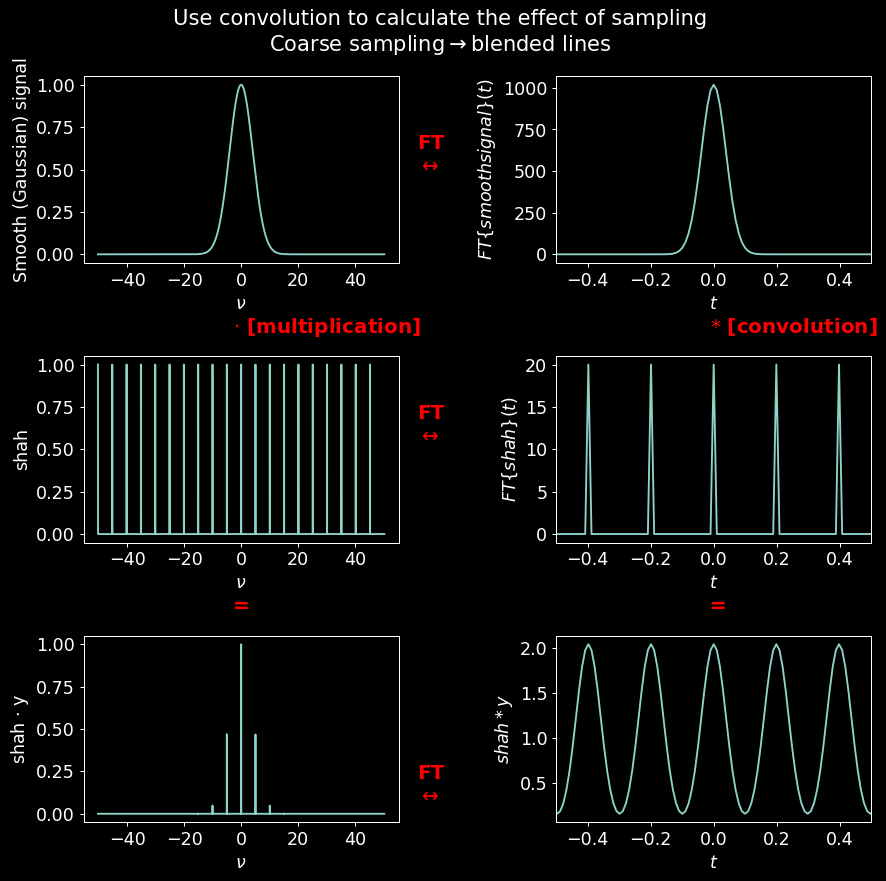

In [161]:
nu = np.linspace(-16*np.pi, 16*np.pi, 10000)
y = np.exp(-nu**2/(2*(1.3*np.pi)**2))
ftx = np.fft.fft(y)
tee = np.fft.fftfreq(y.size) / (nu[1]-nu[0])
fig = pl.figure(figsize=(10,10), dpi=90)
ax1 = pl.subplot(3,2,1)
ax1.plot(nu, y)
ax1.set_xlabel(r'$\nu$')
ax1.set_ylabel(r'Smooth (Gaussian) signal')

ax2 = pl.subplot(3,2,2)
inds = np.argsort(tee)
ax2.plot(tee[inds], np.abs(ftx[inds]))
#ax2.text(-1/(2*np.pi) + 0.01, 4000, r'$t=-1/2\pi$')
#ax2.text(1/(2*np.pi) - 0.01, 4000, r'$t=1/2\pi$', ha='right')
ax2.set_xlim([-0.5, 0.5]);
ax2.set_xlabel('$t$')
ax2.set_ylabel(r'$FT\{smooth signal\}(t)$');

ax3 = pl.subplot(3,2,3)
deltas = np.zeros_like(y)
deltas[::500] = 1
ax3.plot(nu, deltas)
ax3.set_xlabel('$\\nu$')
ax3.set_ylabel(r'shah');


ax5 = pl.subplot(3,2,5)
ax5.plot(nu, deltas * y)
ax5.set_xlabel('$\\nu$')
ax5.set_ylabel(r'shah $\cdot$ y');


ax4 = pl.subplot(3,2,4)
inds = np.argsort(tee)
ftx2 = np.fft.fft(np.fft.fftshift(deltas))
ax4.plot(tee[inds], (ftx2[inds]) )
ax4.set_xlim([-0.5, 0.5]);
ax4.set_xlabel('$t$')

ax4.set_ylabel(r'$FT\{shah\}(t)$');


ax6 = pl.subplot(3,2,6)
inds = np.argsort(tee)
ftx3 = np.fft.fft(np.fft.fftshift(deltas*y))
ax6.plot(tee[inds], np.abs(ftx3[inds]), )
ax6.set_xlim([-0.5, 0.5]);
ax6.set_ylabel(r'$shah * y$');
ax6.set_xlabel('$t$')



pl.suptitle("Use convolution to calculate the effect of sampling\nCoarse sampling$\\rightarrow$blended lines");
pl.tight_layout()
pl.subplots_adjust(wspace=0.5, hspace=0.5)
pl.text(0.475, 0.8, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.5, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.475, 0.1, "FT\n$\\leftrightarrow$", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.62, "$\cdot$ [multiplication]",  transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.62, "$*$ [convolution]", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.27, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);
pl.text(0.8, 0.31, "=", transform=fig.transFigure, color='r', weight='bold', fontsize=16);

# Exercises

Without formally evaluating the Fourier integral, draw by hand the functions below on the left side of the
page, and their Fourier transforms on the right side of the page. (Note: $t_0$ and $f_0$ indicate constants, not
variables.)

 1. $A\cos(2 f_0t)$
 1. $A\sin(2 f_0t)$
 1. $\mathrm{sinc}(2 ft_0)$
 1. $\mathrm{sinc}^2(2 ft_0)$
 1. $\cos(2\cdot f t_0) \mathrm{sinc}(2 ft_0)$
 1. $e^{−t^2} \cos(2 f_0t)$

# Below here can be ignored

$$F(t) = \int_{-\infty}^{\infty} \cos \nu \left[\cos\left(2 \pi t \nu\right) - i \sin\left(2 \pi t \nu\right) \right] d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \nu \cos\left(2 \pi t \nu\right) - i \cos \nu \sin\left(2 \pi t \nu\right)  d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \left[\nu + \left(2 \pi t \nu\right)\right] + \sin \nu \sin\left(2 \pi t \nu\right)  - i \cos \nu \sin\left(2 \pi t \nu\right)  d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \left[\nu + \left(2 \pi t \nu\right)\right]  d\nu$$

$$F(t) = \int_{-\infty}^{\infty} \cos \left[\nu \left(2 \pi t + 1\right)\right]  d\nu$$

$$F(t) = \delta\left(t-1/(2 \pi)\right)$$

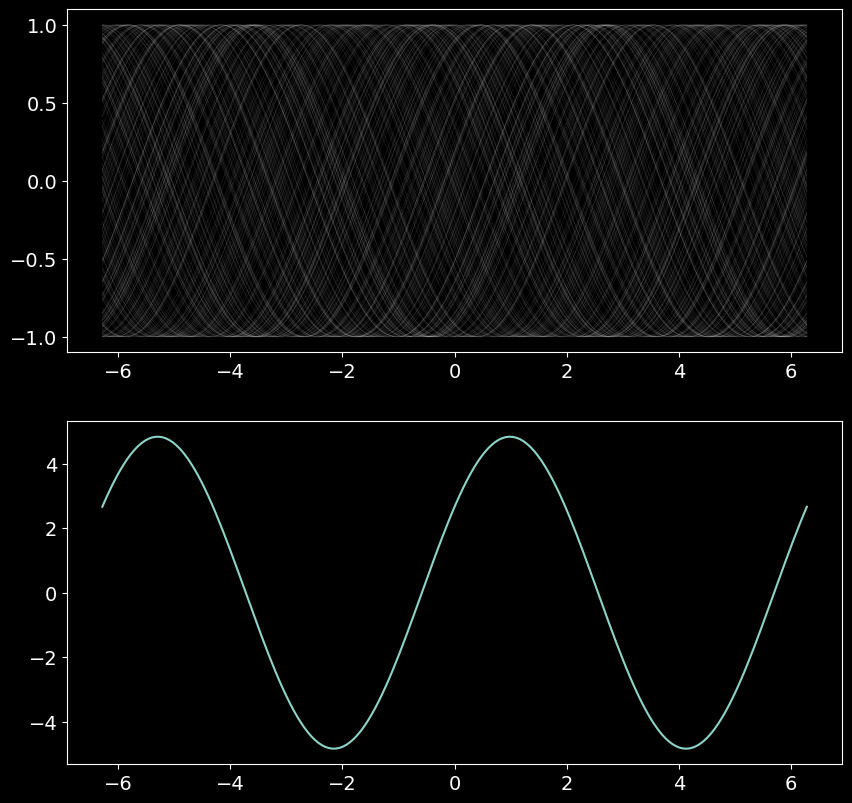

In [30]:
nu = np.linspace(-2*np.pi, 2*np.pi, 200)
zs = np.sin(nu[:,None] + np.random.rand(200)[None,:]*2*np.pi)
pl.figure(figsize=(10,10))
pl.subplot(2,1,1).plot(nu, zs, linewidth=0.5, alpha=0.1, color='w')
pl.subplot(2,1,2).plot(nu, zs.sum(axis=1))

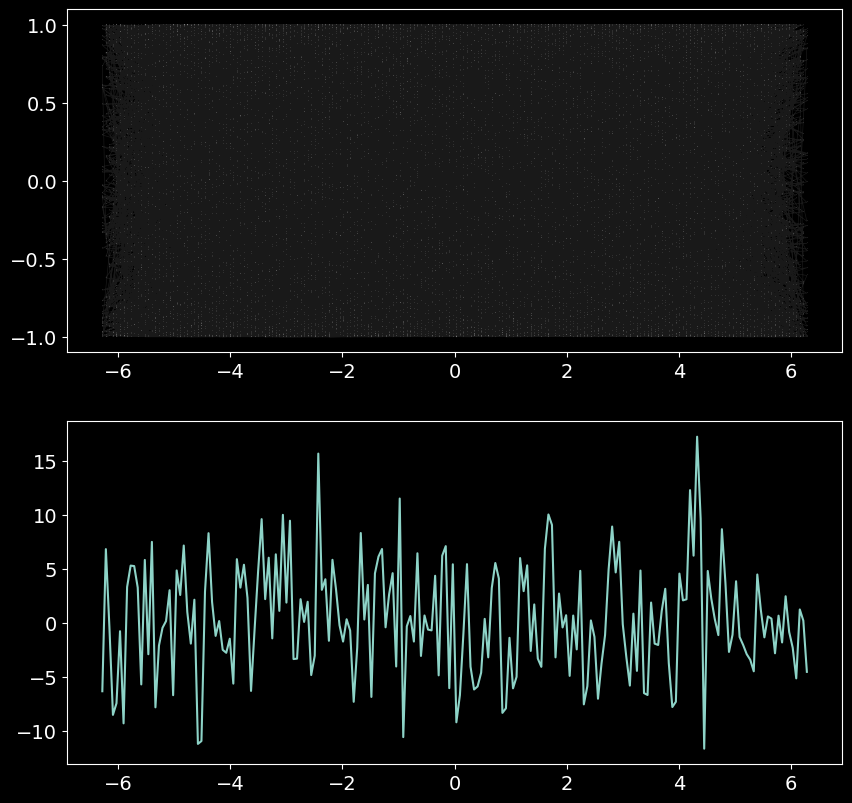

In [31]:
nu = np.linspace(-2*np.pi, 2*np.pi, 200)
nrand = 10000
randnu = np.random.choice(nu, nrand)
zs = np.sin(randnu + np.random.rand(nrand)*2*np.pi)
pl.figure(figsize=(10,10))
pl.subplot(2,1,1).plot(randnu, zs, linewidth=0.5, alpha=0.1, color='w', marker=',')
dx = nu[1] - nu[0]
dx = nu[1] - nu[0]
nubin = [zs[(randnu>=x) & (randnu<(x+dx))].sum() for x in nu]
nubin
pl.subplot(2,1,2).plot(nu, nubin)

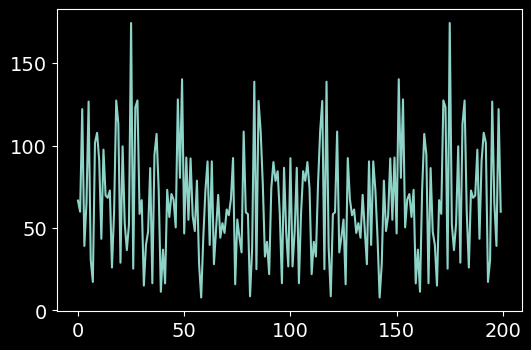

In [32]:
pl.plot(np.abs(np.fft.fft(nubin)))